In [1]:
from time import time
from pandas import DataFrame, concat
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from math import sqrt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)

!pip install pyforest
from pyforest import *
import datetime, pickle, copy
!pip install cryptocompare
import cryptocompare
import requests
!pip install plotly
!pip install cufflinks
import plotly.express as px
import plotly.graph_objects as go
from time import time
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn; seaborn.set()
from sklearn.metrics import mean_squared_error

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings("ignore")

!pip install quandl
import quandl
!pip install ta
import ta

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Data loading

In [6]:
print("....Data loading''''''")

apiKey = "43b01c420b66888ce4c91b364647600814578c186e8604322152f44c641ebbc1"
url = "https://min-api.cryptocompare.com/data/histohour"

# BTC data
payload = {
    "api_key": apiKey,
    "fsym": "BTC",
    "tsym": "USD",
    "limit": 2000
}

result = requests.get(url, params=payload).json()

btc1 = DataFrame(result['Data'])
btc1['time'] = pd.to_datetime(btc1['time'],unit='s')
btc1.set_index('time',inplace=True)
btc1

# 2nd 2000 data
payload = {
    "api_key": apiKey,
    "fsym": "BTC",
    "tsym": "USD",
    "limit": 2000,
    "toTs": (1596736800)
}

result = requests.get(url, params=payload).json()

btc2 = DataFrame(result['Data'])
btc2['time'] = pd.to_datetime(btc2['time'],unit='s')
btc2.set_index('time',inplace=True)
btc2

# 3rd 2000 data
payload = {
    "api_key": apiKey,
    "fsym": "BTC",
    "tsym": "USD",
    "limit": 2000,
    "toTs": (1589540400)
}

result = requests.get(url, params=payload).json()

btc3 = DataFrame(result['Data'])
btc3['time'] = pd.to_datetime(btc3['time'],unit='s')
btc3.set_index('time',inplace=True)

# 4th 2000 data
payload = {
    "api_key": apiKey,
    "fsym": "BTC",
    "tsym": "USD",
    "limit": 2000,
    "toTs": (1582344000)
}

result = requests.get(url, params=payload).json()

btc4 = DataFrame(result['Data'])
btc4['time'] = pd.to_datetime(btc4['time'],unit='s')
btc4.set_index('time',inplace=True)

# combining BTC dataframe
from pandas import DataFrame, concat

# combining BTC dataframe
com1 = btc2.append(btc1)
com2 = btc3.append(com1)
btc = btc4.append(com2)
print(btc)
# saving btc data set
btc.to_csv("bitcoin.csv")

....Data loading''''''


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

                        close      high       low      open  volumefrom     volumeto
time                                                                                
2019-11-30 20:00:00   7522.12   7534.88   7503.92   7529.88      526.15   3960641.74
2019-11-30 21:00:00   7558.29   7559.74   7519.95   7522.12      716.42   5409993.84
2019-11-30 22:00:00   7565.30   7586.43   7558.08   7558.29     1199.54   9098831.82
2019-11-30 23:00:00   7571.77   7585.60   7561.41   7565.30      604.14   4583169.44
2019-12-01 00:00:00   7506.72   7575.50   7496.73   7571.77     1059.74   7990047.66
...                       ...       ...       ...       ...         ...          ...
2020-10-28 22:00:00  13267.00  13285.31  13199.80  13202.98      957.54  12696245.71
2020-10-28 23:00:00  13285.97  13314.62  13249.47  13267.00     1030.13  13684780.72
2020-10-29 00:00:00  13262.20  13314.58  13261.24  13285.97      675.44   8973369.34
2020-10-29 01:00:00  13289.27  13299.94  13190.05  13262.20      

In [7]:
# ETH DATA
payload = {
    "api_key": apiKey,
    "fsym": "ETH",
    "tsym": "USD",
    "limit": 2000
}

result = requests.get(url, params=payload).json()
eth1 = DataFrame(result['Data'])
eth1['time'] = pd.to_datetime(eth1['time'],unit='s')
eth1.set_index('time',inplace=True)

# 2nd 2000 data
payload = {
    "api_key": apiKey,
    "fsym": "ETH",
    "tsym": "USD",
    "limit": 2000,
    "toTs": (1596736800)
}

result = requests.get(url, params=payload).json()
eth2 = DataFrame(result['Data'])
eth2['time'] = pd.to_datetime(eth2['time'],unit='s')
eth2.set_index('time',inplace=True)

# 3rd 2000 data
payload = {
    "api_key": apiKey,
    "fsym": "ETH",
    "tsym": "USD",
    "limit": 2000,
    "toTs": (1589540400)
}

result = requests.get(url, params=payload).json()
eth3 = DataFrame(result['Data'])
eth3['time'] = pd.to_datetime(eth3['time'],unit='s')
eth3.set_index('time',inplace=True)

# 4th ETH 2000 data
payload = {
    "api_key": apiKey,
    "fsym": "ETH",
    "tsym": "USD",
    "limit": 2000,
    "toTs": (1582344000)
}

result = requests.get(url, params=payload).json()

eth4 = DataFrame(result['Data'])
eth4['time'] = pd.to_datetime(eth4['time'],unit='s')
eth4.set_index('time',inplace=True)

# combining dataframe
# combining BTC dataframe
com1 = eth2.append(eth1)
com2 = eth3.append(com1)
eth = eth4.append(com2)
print(eth)
# saving ETH data set
eth.to_csv("Ethereum.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

                      close    high     low    open  volumefrom    volumeto
time                                                                       
2019-11-30 20:00:00  151.33  151.48  150.68  151.05     3192.74   482628.97
2019-11-30 21:00:00  152.38  152.38  151.29  151.33     6868.16  1044041.74
2019-11-30 22:00:00  152.05  153.16  152.02  152.38     9832.95  1499608.13
2019-11-30 23:00:00  152.20  152.73  152.02  152.05     4889.97   746412.82
2019-12-01 00:00:00  151.11  152.20  150.95  152.20     4348.47   657027.45
...                     ...     ...     ...     ...         ...         ...
2020-10-28 22:00:00  387.93  388.39  386.11  386.24     8576.25  3324212.18
2020-10-28 23:00:00  388.77  390.25  387.45  387.93     9032.40  3511697.63
2020-10-29 00:00:00  388.68  390.24  388.21  388.77     6370.71  2480690.70
2020-10-29 01:00:00  391.48  391.72  386.84  388.68     5858.12  2281212.97
2020-10-29 02:00:00  390.20  391.65  389.96  391.48     3087.24  1206397.10

[8004 rows 

In [8]:
# LTC data
payload = {
    "api_key": apiKey,
    "fsym": "LTC",
    "tsym": "USD",
    "limit": 2000
}
result = requests.get(url, params=payload).json()
ltc1 = DataFrame(result['Data'])
ltc1['time'] = pd.to_datetime(ltc1['time'],unit='s')
ltc1.set_index('time',inplace=True)

# 2nd 2000 data
payload = {
    "api_key": apiKey,
    "fsym": "LTC",
    "tsym": "USD",
    "limit": 2000,
    "toTs": (1596736800)
}

result = requests.get(url, params=payload).json()
ltc2 = DataFrame(result['Data'])
ltc2['time'] = pd.to_datetime(ltc2['time'],unit='s')
ltc2.set_index('time',inplace=True)

# 3rd 2000 data
payload = {
    "api_key": apiKey,
    "fsym": "LTC",
    "tsym": "USD",
    "limit": 2000,
    "toTs": (1589540400)
}

result = requests.get(url, params=payload).json()
ltc3 = DataFrame(result['Data'])
ltc3['time'] = pd.to_datetime(ltc3['time'],unit='s')
ltc3.set_index('time',inplace=True)

# 4th ETH 2000 data
payload = {
    "api_key": apiKey,
    "fsym": "ETH",
    "tsym": "USD",
    "limit": 2000,
    "toTs": (1582344000)
}

result = requests.get(url, params=payload).json()

ltc4 = DataFrame(result['Data'])
ltc4['time'] = pd.to_datetime(ltc4['time'],unit='s')
ltc4.set_index('time',inplace=True)

# combining dataframe
# combining BTC dataframe
com1 = ltc2.append(btc1)
com2 = ltc3.append(com1)
ltc = ltc4.append(com2)
print(ltc)
# saving btc data set
ltc.to_csv("litecoin.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

                        close      high       low      open  volumefrom     volumeto
time                                                                                
2019-11-30 20:00:00    151.33    151.48    150.68    151.05     3192.74    482628.97
2019-11-30 21:00:00    152.38    152.38    151.29    151.33     6868.16   1044041.74
2019-11-30 22:00:00    152.05    153.16    152.02    152.38     9832.95   1499608.13
2019-11-30 23:00:00    152.20    152.73    152.02    152.05     4889.97    746412.82
2019-12-01 00:00:00    151.11    152.20    150.95    152.20     4348.47    657027.45
...                       ...       ...       ...       ...         ...          ...
2020-10-28 22:00:00  13267.00  13285.31  13199.80  13202.98      957.54  12696245.71
2020-10-28 23:00:00  13285.97  13314.62  13249.47  13267.00     1030.13  13684780.72
2020-10-29 00:00:00  13262.20  13314.58  13261.24  13285.97      675.44   8973369.34
2020-10-29 01:00:00  13289.27  13299.94  13190.05  13262.20      

### Data Exploration

In [9]:
# --Data Selection
from pandas import DataFrame, concat

df = DataFrame({'LTC': ltc.close,'ETH': eth.close})
dataframe = concat([btc, df], axis=1)
dataframe

close      high       low      open  volumefrom     volumeto       LTC     ETH
time                                                                                                  
2019-11-30 20:00:00   7522.12   7534.88   7503.92   7529.88      526.15   3960641.74    151.33  151.33
2019-11-30 21:00:00   7558.29   7559.74   7519.95   7522.12      716.42   5409993.84    152.38  152.38
2019-11-30 22:00:00   7565.30   7586.43   7558.08   7558.29     1199.54   9098831.82    152.05  152.05
2019-11-30 23:00:00   7571.77   7585.60   7561.41   7565.30      604.14   4583169.44    152.20  152.20
2019-12-01 00:00:00   7506.72   7575.50   7496.73   7571.77     1059.74   7990047.66    151.11  151.11
...                       ...       ...       ...       ...         ...          ...       ...     ...
2020-10-28 22:00:00  13267.00  13285.31  13199.80  13202.98      957.54  12696245.71  13267.00  387.93
2020-10-28 23:00:00  13285.97  13314.62  13249.47  13267.00     1030.13  13684780.72  13285.97  388.77
2020-10-29 00:00:00  13262.20  13314.58  13261.24  13285.97      675.44   8973369.34  13262.20  388.68
2020-10-29 01:00:00  13289.27  13299.94  13190.05  13262.20      846.50  11212153.28  13289.27  391.48
2020-10-29 02:00:00  13238.55  13292.53  13227.04  13289.27      294.29   3902749.09  13238.55  390.20

[8004 rows x 8 columns]

### Query By Time & Visualization

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

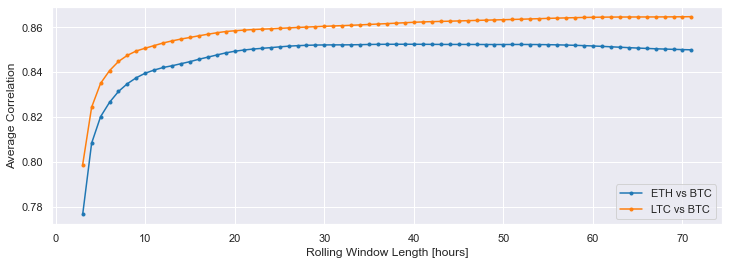

In [10]:
blue, orange = '#1f77b4', '#ff7f0e'  # color codes

plt.figure(figsize=(12,4))
#plt.grid()
 
avg_corr1, avg_corr2 = list(), list()
 
# average correlation for increasing rolling window size
for win in range(3, 72):  # hours
    avg_corr1.append(dataframe.ETH.rolling(win).corr(dataframe.close) \
                     .replace([np.inf, -np.inf], np.nan).dropna().mean())
    avg_corr2.append(dataframe.LTC.rolling(win).corr(dataframe.close) \
                     .replace([np.inf, -np.inf], np.nan).dropna().mean())
    
plt.plot(range(3, 72), avg_corr1, '.-', color=blue, label='ETH vs BTC')
plt.plot(range(3, 72), avg_corr2, '.-', color=orange, label='LTC vs BTC')

plt.legend()
plt.xlabel('Rolling Window Length [hours]', fontsize=12)
plt.ylabel('Average Correlation', fontsize=12)
plt.show()

<IPython.core.display.Javascript object>

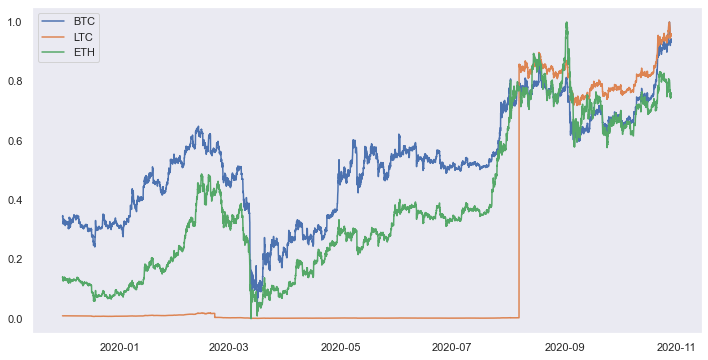

In [11]:
from sklearn.preprocessing import MinMaxScaler

data = DataFrame({'BTC': dataframe.close, 'LTC': ltc.close, 'ETH': eth.close})
scaler = MinMaxScaler(feature_range=(0, 1))
sdf_np = scaler.fit_transform(data)  # note: scaler converts df into numpy array
sdf = pd.DataFrame(sdf_np, columns=data.columns, index=data.index)
 
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(sdf)
plt.legend(sdf.columns)
plt.show()

Motivation for the selection of Litecoin and Ethereum is their pretty high correlation with Bitcoin 
regardless the number of hours taken into account. We can diagnose this by measuring the average linear 
correlation over the rolling window in a function of rolling window size as hsown below.


### Visualize relative changes in closing prices
We are interested in a relative change of the price rather than in absolute price, so we use three different y-axis scales. We see that closing prices move in tandem. When one coin closing price increases so do the other.

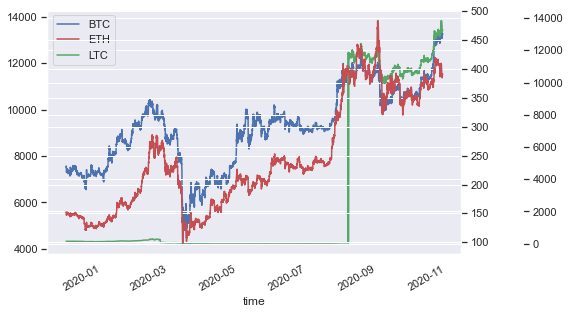

In [12]:
fig, ax1 = plt.subplots(figsize=(10,5))
ax2 = ax1.twinx()
rspine = ax2.spines['right']
rspine.set_position(('axes', 1.15))
ax2.set_frame_on(True)
ax2.patch.set_visible(False)
fig.subplots_adjust(right=0.7)
btc.close.plot(ax=ax1, style='b-')
eth.close.plot(ax=ax1, style='r-', secondary_y=True)
ltc.close.plot(ax=ax2, style='g-')

# legend
ax2.legend([ax1.get_lines()[0],
            ax1.right_ax.get_lines()[0],
            ax2.get_lines()[0]],
           ['BTC', 'ETH', 'LTC'])
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

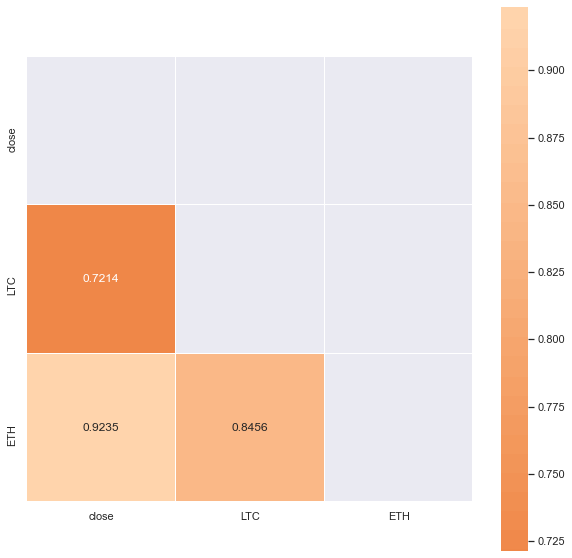

In [13]:
cor = dataframe[['close', 'LTC', 'ETH']]

# Compute the correlation matrix
corr = cor.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt = '.4f', mask=mask, center=0, square=True, linewidths=.5)
# value > 0.5 is considerred correlated, >0.8 is highly correlated
plt.show()

### Histogram of BTC closing price
Let’s estimate the frequency distribution of BTC closing prices. The histogram shows the number of hours BTC had a certain value.

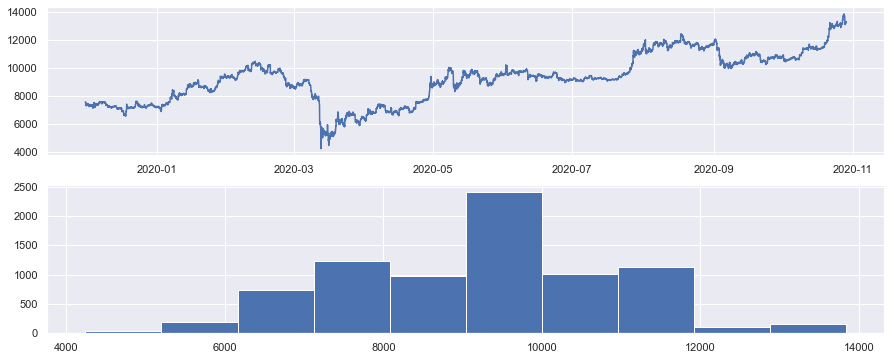

In [14]:
plt.figure(1)
# line plot
plt.subplot(211)
plt.plot(btc.close)
# histogram
plt.subplot(212)
plt.hist(btc.close)
plt.show()

This looks like familiar Gaussian-like or Uniform-like distribution of values. However, we will perform few more tests to satisfy stationarity.

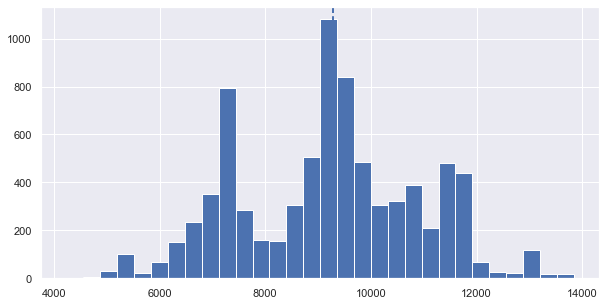

In [15]:
btc.close.hist(bins=30, figsize=(10,5)).axvline(btc.close.median(), 
                                                        color='b', linestyle='dashed', linewidth=2)
plt.show()

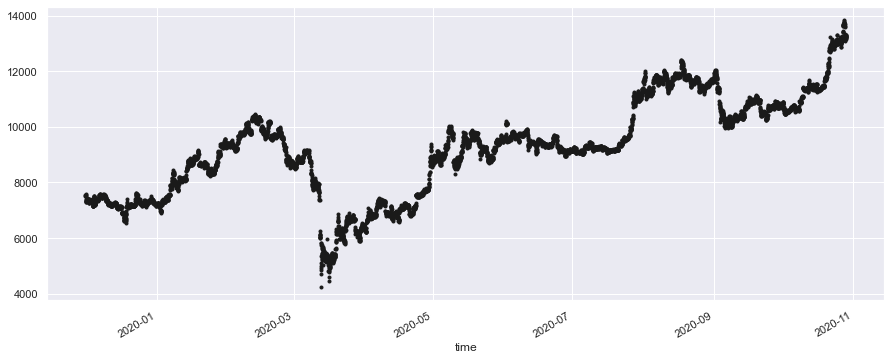

In [16]:
btc.close.plot(style='k.')
plt.show()

<IPython.core.display.Javascript object>

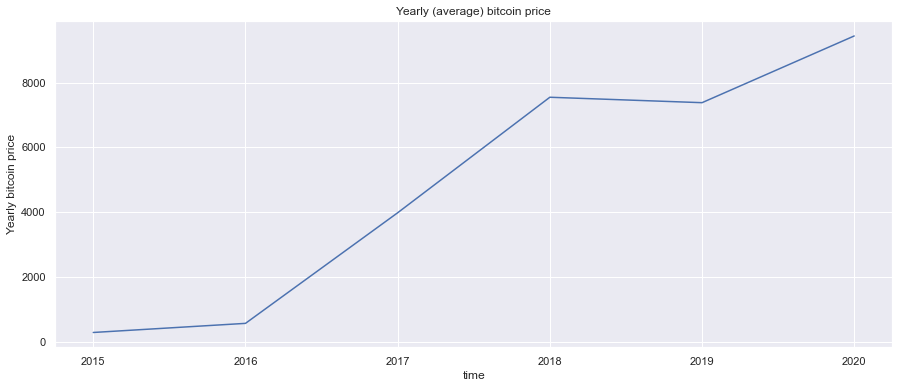

In [17]:
apiKey = "43b01c420b66888ce4c91b364647600814578c186e8604322152f44c641ebbc1"
url = "https://min-api.cryptocompare.com/data/histoday"

# BTC data
payload = {
    "api_key": apiKey,
    "fsym": "BTC",
    "tsym": "USD",
    "limit": 2000
}

result = requests.get(url, params=payload).json()

btcY = DataFrame(result['Data'])
btcY['time'] = pd.to_datetime(btcY['time'],unit='s')
btcY.set_index('time',inplace=True)

# Group by year & average the data

by_year = btcY.close.groupby(btcY.index.year).mean()
by_year.plot()
plt.ylabel('Yearly bitcoin price')
plt.title('Yearly (average) bitcoin price')
plt.show()

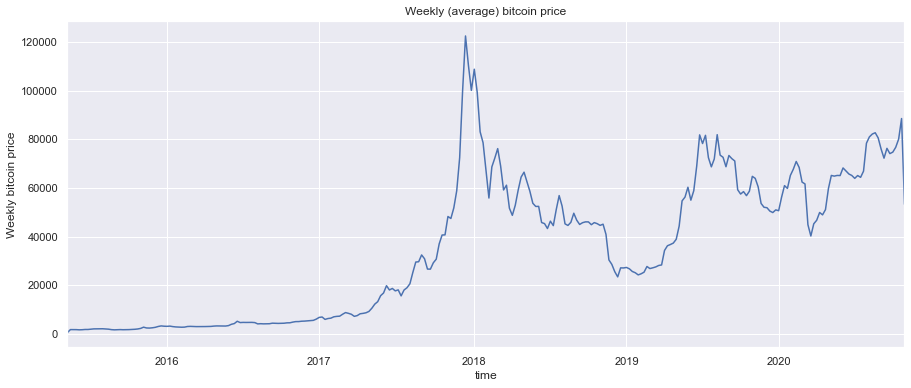

In [18]:
# Resample the time scale by week and sum closing values.

weekly = btcY.close.resample('W').sum()
weekly.plot()
plt.ylabel('Weekly bitcoin price')
plt.title('Weekly (average) bitcoin price')
plt.show()

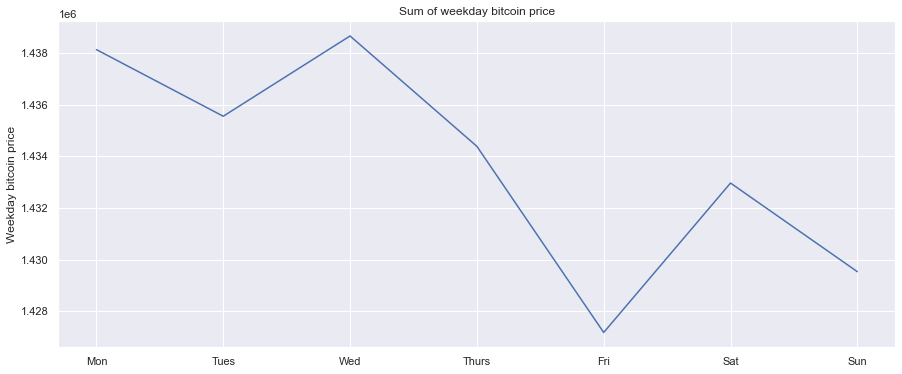

In [19]:
# Group by weekdays & sum the data sample

by_weekday = btcY.close.groupby(btcY.index.dayofweek).sum()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot()
plt.ylabel('Weekday bitcoin price')
plt.title('Sum of weekday bitcoin price')
plt.show()

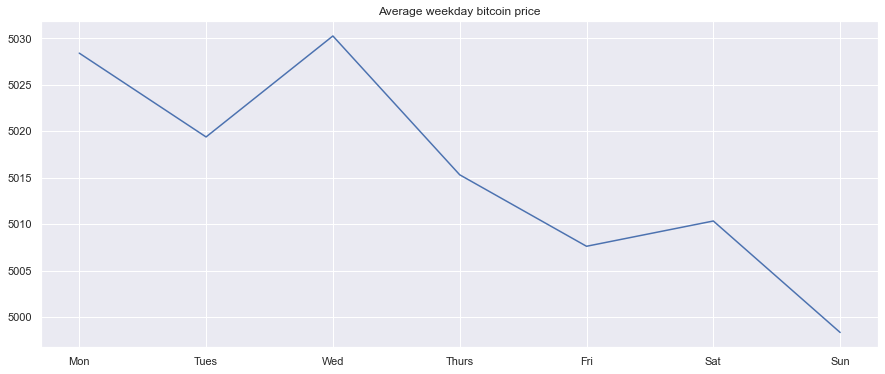

In [20]:
# Group by weekdays & average the data sample

by_weekday = btcY.close.groupby(btcY.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot()
plt.title('Average weekday bitcoin price')
plt.show()

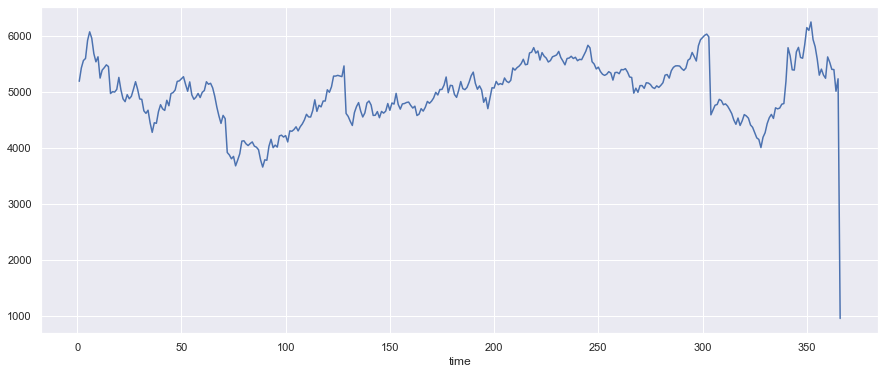

In [21]:
# Group by day & average the data sample
by_day = btcY.close.groupby(btcY.index.dayofyear).mean()
by_day.plot()
plt.show()

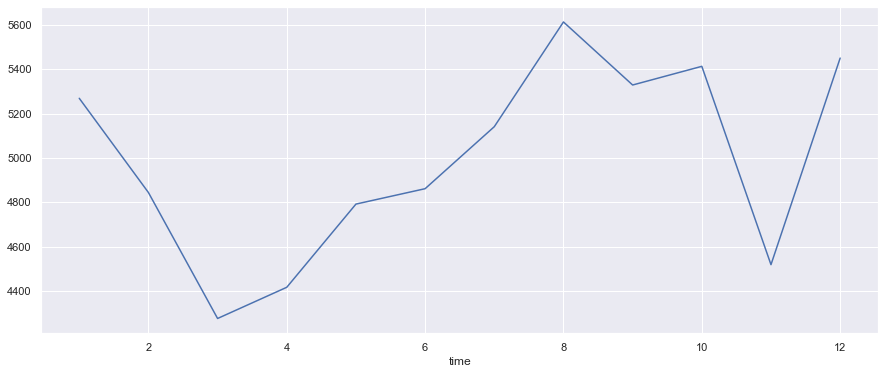

In [22]:
# Group by month & average the data sample
by_month = btcY.close.groupby(btcY.index.month).mean()
by_month.plot()
plt.show()

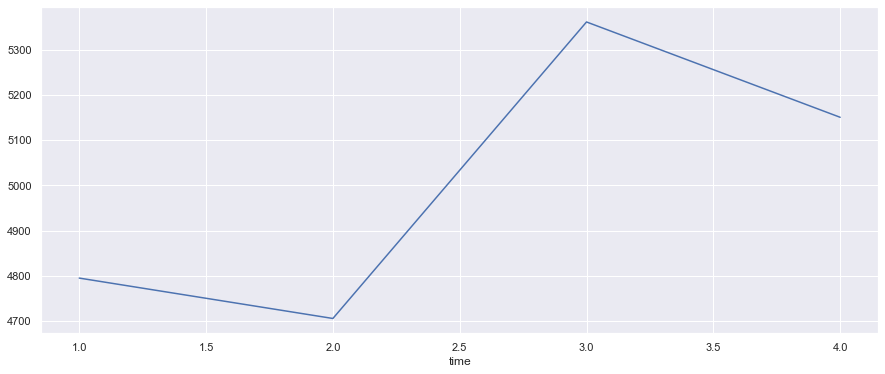

In [23]:
# Group by quarter & average the data sample
by_quarter = btcY.close.groupby(btcY.index.quarter).mean()
by_quarter.plot()
plt.show()

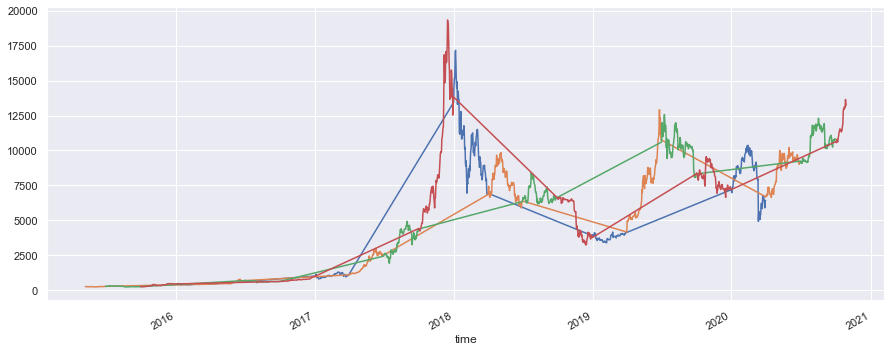

In [24]:
by_quarter = btcY.close.groupby(btcY.index.quarter)
by_quarter.plot()
plt.show()

<IPython.core.display.Javascript object>

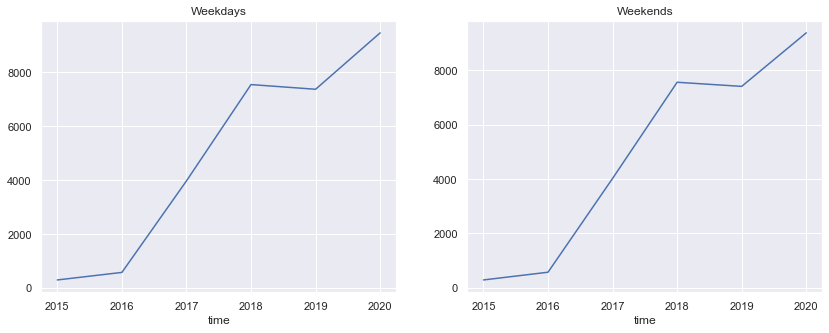

In [25]:
# Weekdays vs Weekend per year average
weekend = np.where(btcY.index.weekday < 5, 'Weekday', 'Weekend')
by_time = btcY.close.groupby([weekend, btcY.index.year]).mean()
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays')
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends')
plt.show()

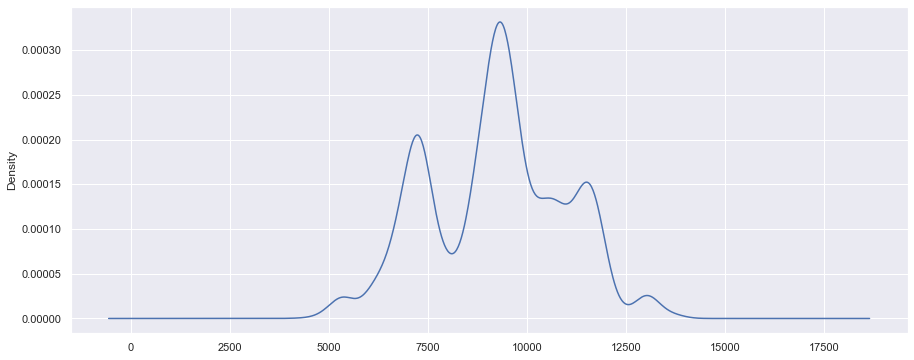

In [26]:
btc.close.plot(kind='kde')
plt.show()

We can see that perhaps the distribution is a bit asymmetrical to be Gaussian. 

### Descriptive statistics

In [27]:
btc.close.describe()

count     8004.000000
mean      9211.271079
std       1721.183937
min       4240.690000
25%       7700.932500
50%       9279.945000
75%      10429.982500
max      13841.820000
Name: close, dtype: float64

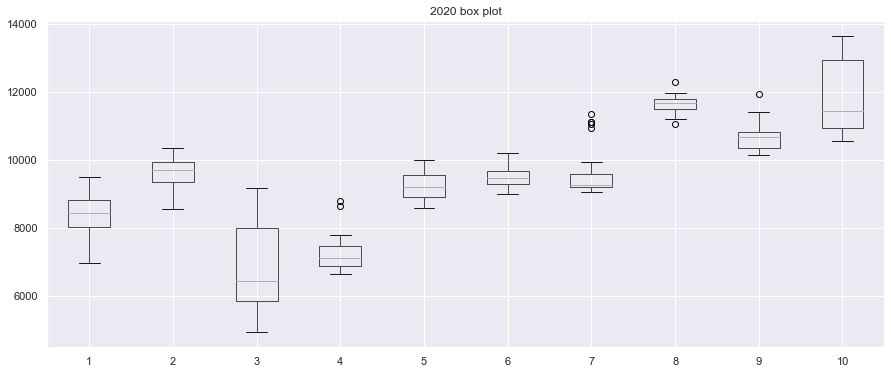

In [28]:
from pandas import DataFrame
from pandas import Grouper
from pandas import concat

one_year = btcY.close['2020']
groups = one_year.groupby(Grouper(freq='M'))
months = concat([DataFrame(x[1].values) for x in groups], axis=1)
months = DataFrame(months)
months.columns = range(1,11)
months.boxplot()
plt.title('2020 box plot')
plt.show()

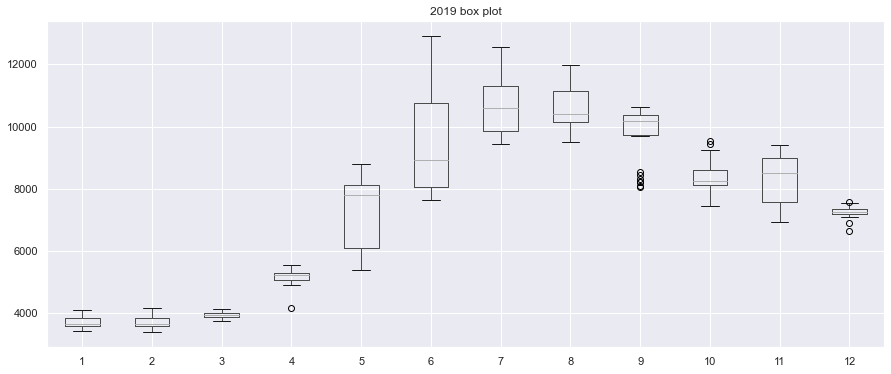

In [29]:
from pandas import DataFrame
from pandas import Grouper
from pandas import concat

one_year = btcY.close['2019']
groups = one_year.groupby(Grouper(freq='M'))
months = concat([DataFrame(x[1].values) for x in groups], axis=1)
months = DataFrame(months)
months.columns = range(1,13)
months.boxplot()
plt.title('2019 box plot')
plt.show()

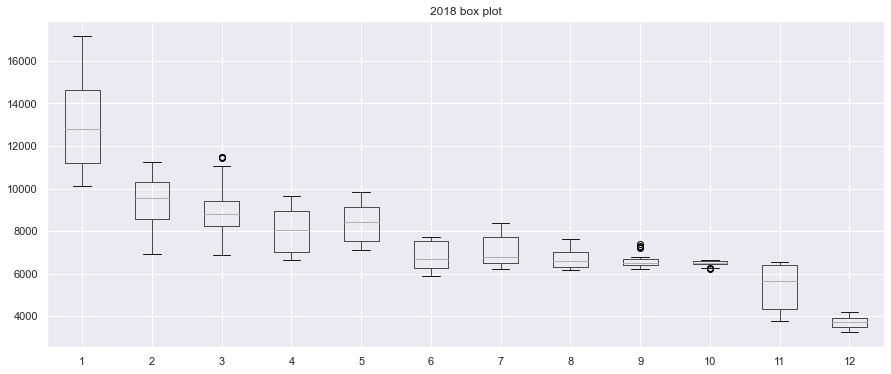

In [30]:
one_year = btcY.close['2018']
groups = one_year.groupby(Grouper(freq='M'))
months = concat([DataFrame(x[1].values) for x in groups], axis=1)
months = DataFrame(months)
months.columns = range(1,13)
months.boxplot()
plt.title('2018 box plot')
plt.show()

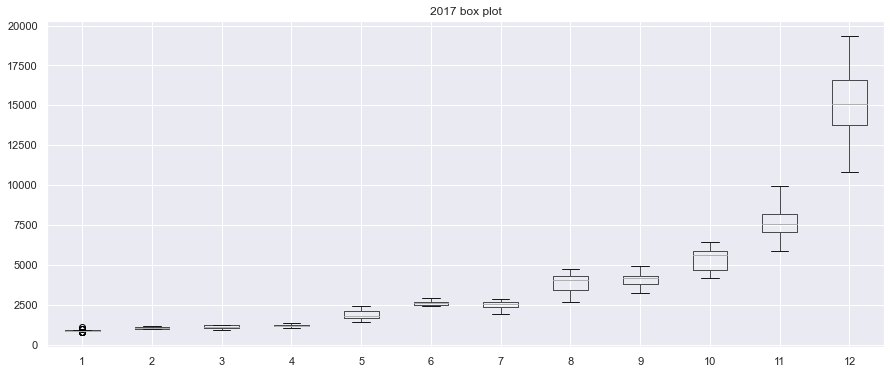

In [31]:
one_year = btcY.close['2017']
groups = one_year.groupby(Grouper(freq='M'))
months = concat([DataFrame(x[1].values) for x in groups], axis=1)
months = DataFrame(months)
months.columns = range(1,13)
months.boxplot()
plt.title('2017 box plot')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


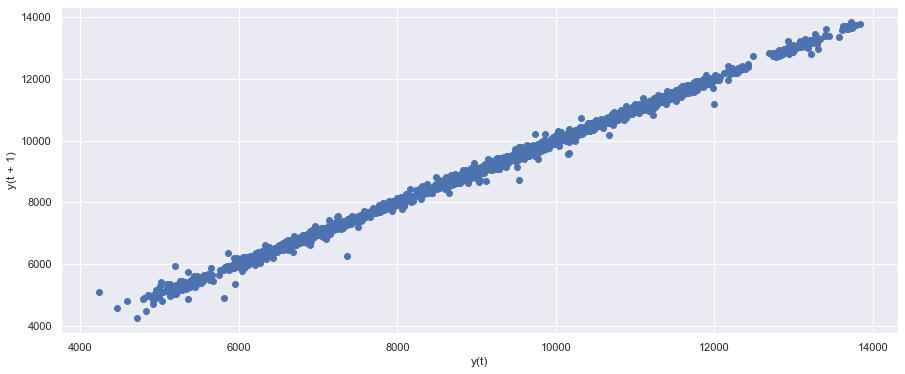

In [32]:
from pandas.plotting import lag_plot
lag_plot(btc.close)
plt.show()

We can observe the strongest relationship between the price with its lag=1 value, but generally a good positive correlation with each value in the last 8 hrs.

In [33]:
pip install ruptures

Note: you may need to restart the kernel to use updated packages.


In [34]:
import ruptures as rpt

<IPython.core.display.Javascript object>

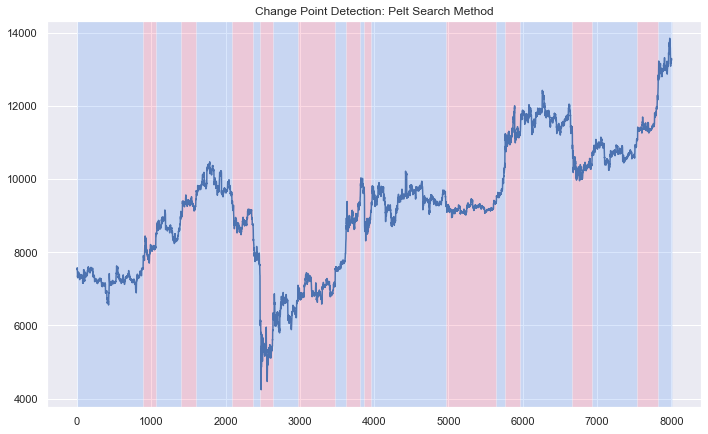

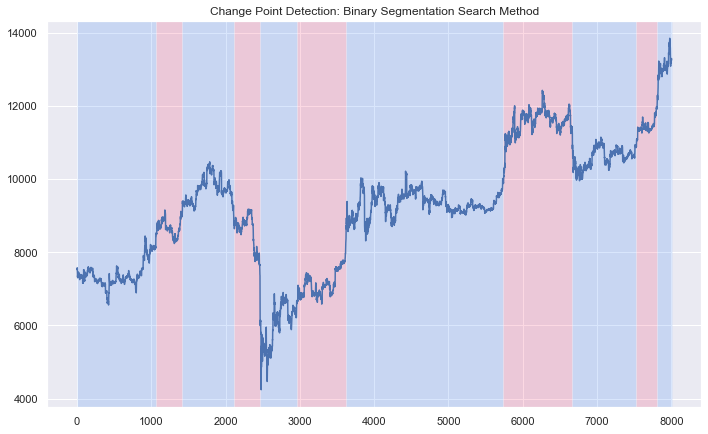

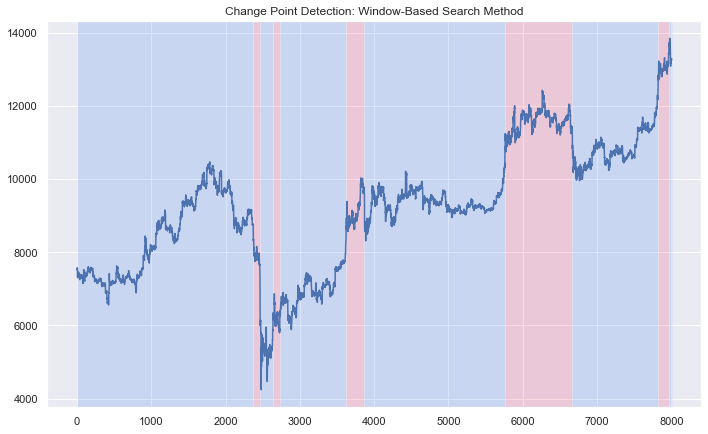

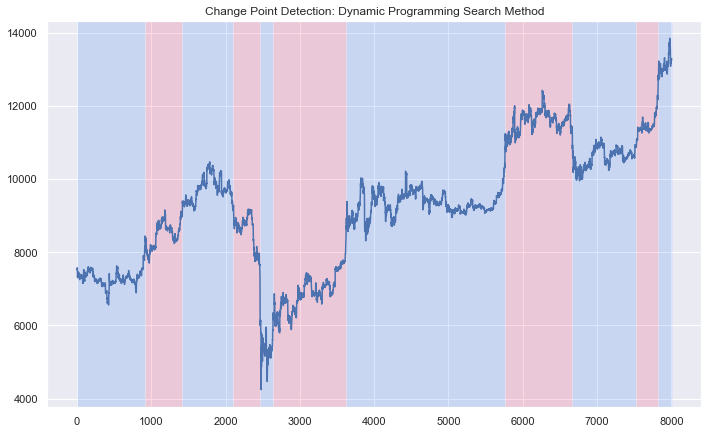

In [35]:
#Convert the time series values to a numpy 1D array
points=np.array(btc.close)
    
#RUPTURES PACKAGE
#Changepoint detection with the Pelt search method
model="rbf"
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=10)
rpt.display(points, result, figsize=(10, 6))
plt.title('Change Point Detection: Pelt Search Method')
plt.show()  
    
#Changepoint detection with the Binary Segmentation search method
model = "l2"  
algo = rpt.Binseg(model=model).fit(points)
my_bkps = algo.predict(n_bkps=10)
# show results
rpt.show.display(points, my_bkps, figsize=(10, 6))
plt.title('Change Point Detection: Binary Segmentation Search Method')
plt.show()
    
#Changepoint detection with window-based search method
model = "l2"  
algo = rpt.Window(width=40, model=model).fit(points)
my_bkps = algo.predict(n_bkps=10)
rpt.show.display(points, my_bkps, figsize=(10, 6))
plt.title('Change Point Detection: Window-Based Search Method')
plt.show()
    
#Changepoint detection with dynamic programming search method
model = "l1"  
algo = rpt.Dynp(model=model, min_size=3, jump=5).fit(points)
my_bkps = algo.predict(n_bkps=10)
rpt.show.display(points, my_bkps, figsize=(10, 6))
plt.title('Change Point Detection: Dynamic Programming Search Method')
plt.show()

the detected change points in the sequence differ based on the search method used. PELT and dynamic programming methods are both exact (as opposed to approximate) methods, so they are generally more accurate.

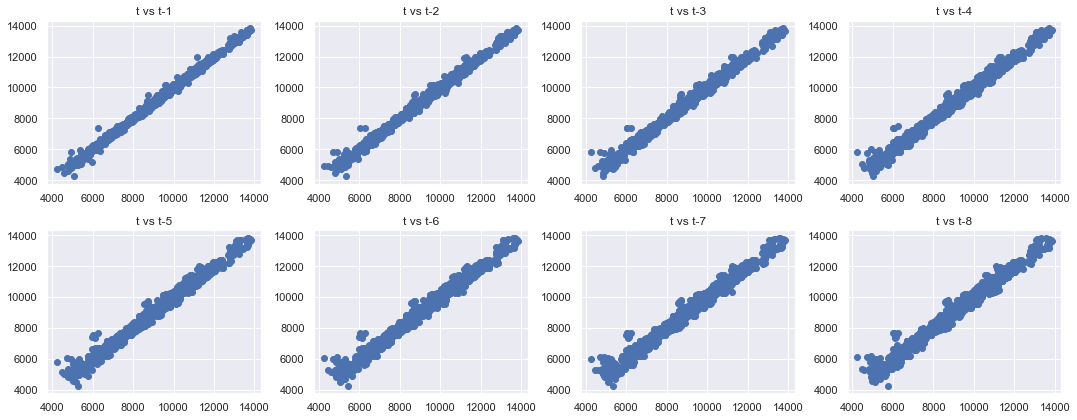

In [36]:
values = DataFrame(btc.close.values)

lags = 8
columns = [values]
for i in range(1,(lags + 1)):
    columns.append(values.shift(i))
dt = concat(columns, axis=1)
columns = ['t']
for i in range(1,(lags + 1)):
    columns.append('t-' + str(i))
dt.columns = columns
plt.figure(1)
for i in range(1,(lags + 1)):
    ax = plt.subplot(240 + i)
    ax.set_title('t vs t-' + str(i))
    plt.scatter(x=dt['t'].values, y=dt['t-'+str(i)].values)
    
dt.index = dataframe.index
plt.tight_layout()
plt.show()

### Joining dataframe

In [37]:
dataframe = concat([dataframe, dt], axis=1)
dataframe.drop(columns = ['t'], axis=1, inplace=True)
dataframe.tail()

close      high       low      open  volumefrom     volumeto       LTC     ETH       t-1       t-2       t-3       t-4  \
time                                                                                                                                             
2020-10-28 22:00:00  13267.00  13285.31  13199.80  13202.98      957.54  12696245.71  13267.00  387.93  13202.98  13216.60  13173.94  13219.46   
2020-10-28 23:00:00  13285.97  13314.62  13249.47  13267.00     1030.13  13684780.72  13285.97  388.77  13267.00  13202.98  13216.60  13173.94   
2020-10-29 00:00:00  13262.20  13314.58  13261.24  13285.97      675.44   8973369.34  13262.20  388.68  13285.97  13267.00  13202.98  13216.60   
2020-10-29 01:00:00  13289.27  13299.94  13190.05  13262.20      846.50  11212153.28  13289.27  391.48  13262.20  13285.97  13267.00  13202.98   
2020-10-29 02:00:00  13238.55  13292.53  13227.04  13289.27      294.29   3902749.09  13238.55  390.20  13289.27  13262.20  13285.97  13267.00   

                          t-5       t-6       t-7       t-8  
time                                                         
2020-10-28 22:00:00  13193.33  13162.61  13237.39  13080.26  
2020-10-28 23:00:00  13219.46  13193.33  13162.61  13237.39  
2020-10-29 00:00:00  13173.94  13219.46  13193.33  13162.61  
2020-10-29 01:00:00  13216.60  13173.94  13219.46  13193.33  
2020-10-29 02:00:00  13202.98  13216.60  13173.94  13219.46

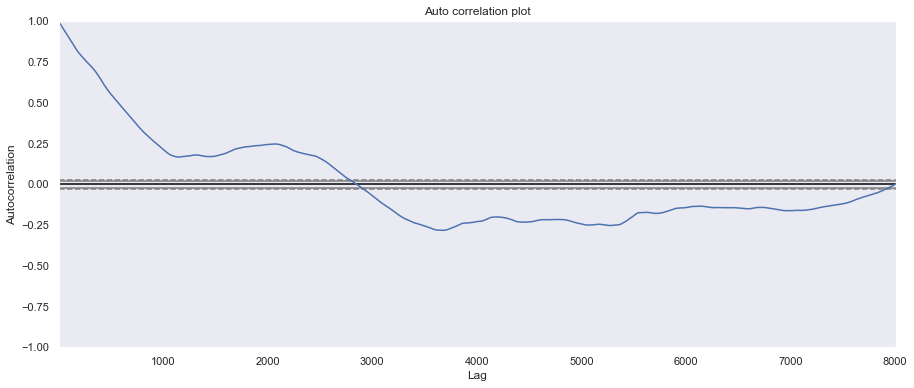

In [38]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(btc.close)
plt.title('Auto correlation plot')
plt.show()

The resulting plot shows lag along the x-axis and the correlation on the y-axis. Dotted lines are the indicate any correlation values above those lines are statistically significant (meaningful). We can see cycles of strong negative and positive correlation. This captures the relationship of an price with past observations in the same and opposite times of year. Sine waves like those seen in this example are a strong sign of seasonality in the dataset.

### Stationarity test

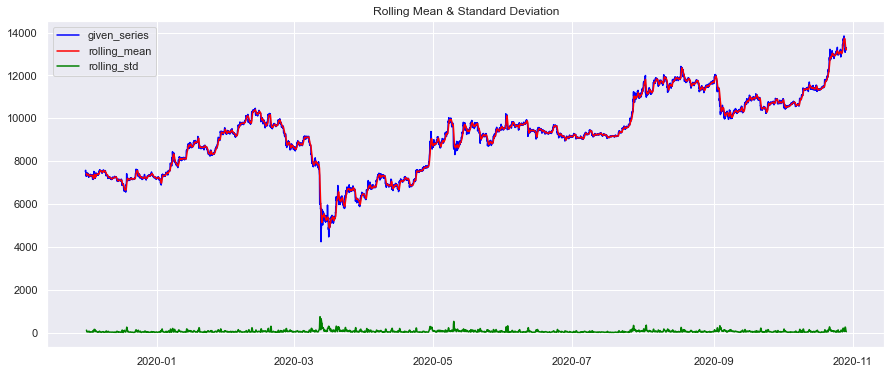

Results of Dickey-Fuller Test:


<IPython.core.display.Javascript object>

Test Statistic                   -0.827031
p-value                           0.811053
#Lags Used                        0.000000
Number of Observations Used    8003.000000
Critical Value (1%)              -3.431167
Critical Value (5%)              -2.861901
Critical Value (10%)             -2.566962
dtype: float64


In [39]:
from statsmodels.tsa.stattools import adfuller

data = btc['close']
def test_for_stationary(input_data):
    r_mean = input_data.rolling(window = 12,center=False).mean()
    r_std = input_data.rolling(window = 12,center=False).std()
    
    # plotting the data
    given = plt.plot(input_data, color = 'blue', label = 'given_series')
    rolling_mean = plt.plot(r_mean, color = 'red', label = 'rolling_mean')
    rolling_std = plt.plot(r_std, color ='green', label = 'rolling_std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
     #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(input_data)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
      
test_for_stationary(data)

- p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
- p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

The test statistic is 0.05 compared to the crtical value. Test statistic is -2.84; the more negative this statistic, the more likely we are to reject the null hypothesis (we have a stationary dataset). As part of the output, we get a look-up table to help determine the ADF statistic. We can see that our statistic is less than the value of -3.449 at 1%. This suggests that we can reject the null hypothesis with a significance level of less than 1% (i.e. a low probability that the result is a statistical fuke).

The above series show that rolling mean value varies with time and is stationary. The series do not need to be Stationarized. we do not need to eliminate the trend and seasonality from the series to make it stationary.

### volatility measure – standard deviation

In [40]:
ret = 100* btc.close.pct_change().dropna()

std_monthly = np.std(ret)*np.sqrt(30)
print ('monthly volatility (std)=',round(std_monthly,4))

std_weekly = np.std(ret)*np.sqrt(7)
print ('weekly volatility (std)=',round(std_weekly,4))

std_daily = np.std(ret)*np.sqrt(1)
print ('daily volatility (std)=',round(std_daily,4))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

monthly volatility (std)= 4.2926


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

weekly volatility (std)= 2.0735


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

daily volatility (std)= 0.7837


Since this p-value is zero, we reject the null hypothesis. In other words, we conclude that BTC's hourly returns do not follow a normal distribution.

In [41]:
from scipy import stats

# Anderson Darling test
print(stats.anderson(ret))

AndersonResult(statistic=518.7524950480765, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


At 1 % confidence level—the critical value is 1.09. Since our testing statistic is 81.67, which is much higher than the critical value of 1.09, we reject the null hypothesis. Thus, our Anderson-Darling test leads to the same conclusion as our Shapiro-Wilk test.

### Estimating fat tails

In [42]:
print('BTC =',len(ret))
print('BTC mean =',round(np.mean(ret),4))
print('BTC std =',round(np.std(ret),4))
print('BTC skewness=',round(stats.skew(ret),4))
print('BTC kurtosis=',round(stats.kurtosis(ret),4))

BTC = 8003


<IPython.core.display.Javascript object>

BTC mean = 0.0101


<IPython.core.display.Javascript object>

BTC std = 0.7837
BTC skewness= 0.3982
BTC kurtosis= 125.8967


### Tests of normality

In [43]:
# Shapiro test
ret = 100* btc.close.pct_change().dropna()
print ('W-test, and P-value')
print(stats.shapiro(ret))

W-test, and P-value
ShapiroResult(statistic=0.6394240260124207, pvalue=0.0)


### Mean & variance
Split the time series into two contiguous sequences to calculate the mean and variance of each group of numbers and compare the values.

In [44]:
X = btc.close.values
split = int(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1 = %f, mean2 = %f' % (mean1, mean2))
print('variance1 = %f, variance2 = %f' % (var1, var2))

mean1 = 7964.023433, mean2 = 10458.518726
variance1 = 1548554.323889, variance2 = 1264400.333155


We can see the mean and variance values are similar. Our price series is stationary.

### Feature engineering

In [45]:
dataframe['day_of_week'] = dataframe.index.dayofweek
dataframe['day_of_month'] = dataframe.index.day
dataframe['hour'] = dataframe.index.hour
dataframe['day_of_year'] = dataframe.index.dayofyear
dataframe

close      high       low      open  volumefrom     volumeto       LTC     ETH       t-1       t-2       t-3       t-4  \
time                                                                                                                                             
2019-11-30 20:00:00   7522.12   7534.88   7503.92   7529.88      526.15   3960641.74    151.33  151.33       NaN       NaN       NaN       NaN   
2019-11-30 21:00:00   7558.29   7559.74   7519.95   7522.12      716.42   5409993.84    152.38  152.38   7522.12       NaN       NaN       NaN   
2019-11-30 22:00:00   7565.30   7586.43   7558.08   7558.29     1199.54   9098831.82    152.05  152.05   7558.29   7522.12       NaN       NaN   
2019-11-30 23:00:00   7571.77   7585.60   7561.41   7565.30      604.14   4583169.44    152.20  152.20   7565.30   7558.29   7522.12       NaN   
2019-12-01 00:00:00   7506.72   7575.50   7496.73   7571.77     1059.74   7990047.66    151.11  151.11   7571.77   7565.30   7558.29   7522.12   
...                       ...       ...       ...       ...         ...          ...       ...     ...       ...       ...       ...       ...   
2020-10-28 22:00:00  13267.00  13285.31  13199.80  13202.98      957.54  12696245.71  13267.00  387.93  13202.98  13216.60  13173.94  13219.46   
2020-10-28 23:00:00  13285.97  13314.62  13249.47  13267.00     1030.13  13684780.72  13285.97  388.77  13267.00  13202.98  13216.60  13173.94   
2020-10-29 00:00:00  13262.20  13314.58  13261.24  13285.97      675.44   8973369.34  13262.20  388.68  13285.97  13267.00  13202.98  13216.60   
2020-10-29 01:00:00  13289.27  13299.94  13190.05  13262.20      846.50  11212153.28  13289.27  391.48  13262.20  13285.97  13267.00  13202.98   
2020-10-29 02:00:00  13238.55  13292.53  13227.04  13289.27      294.29   3902749.09  13238.55  390.20  13289.27  13262.20  13285.97  13267.00   

                          t-5       t-6       t-7       t-8  day_of_week  day_of_month  hour  day_of_year  
time                                                                                                       
2019-11-30 20:00:00       NaN       NaN       NaN       NaN            5            30    20          334  
2019-11-30 21:00:00       NaN       NaN       NaN       NaN            5            30    21          334  
2019-11-30 22:00:00       NaN       NaN       NaN       NaN            5            30    22          334  
2019-11-30 23:00:00       NaN       NaN       NaN       NaN            5            30    23          334  
2019-12-01 00:00:00       NaN       NaN       NaN       NaN            6             1     0          335  
...                       ...       ...       ...       ...          ...           ...   ...          ...  
2020-10-28 22:00:00  13193.33  13162.61  13237.39  13080.26            2            28    22          302  
2020-10-28 23:00:00  13219.46  13193.33  13162.61  13237.39            2            28    23          302  
2020-10-29 00:00:00  13173.94  13219.46  13193.33  13162.61            3            29     0          303  
2020-10-29 01:00:00  13216.60  13173.94  13219.46  13193.33            3            29     1          303  
2020-10-29 02:00:00  13202.98  13216.60  13173.94  13219.46            3            29     2          303  

[8004 rows x 20 columns]

### Exponential MA

In Simple Moving Average, each value in the time period carries equal weight,  and values outside of the time period are not included in the average.  However, the Exponential Moving Average is a cumulative calculation,  including all data. Past values have a diminishing contribution to the average, while more recent values have a greater contribution.  This method allows the moving average to be more responsive to changes in the data.

In [46]:
dataframe['d_20'] = dataframe['close'].shift(480)
dataframe['btc_5EMA'] = (dataframe['close'].ewm(span=5,adjust=True,ignore_na=True).mean())
dataframe['btc_10EMA'] = (dataframe['close'].ewm(span=10,adjust=True,ignore_na=True).mean())
dataframe['btc_20EMA'] = (dataframe['close'].ewm(span=20,adjust=True,ignore_na=True).mean())
dataframe['btc_48EMA'] = (dataframe['close'].ewm(span=30,adjust=True,ignore_na=True).mean())
dataframe['btc_96EMA'] = (dataframe['close'].ewm(span=60,adjust=True,ignore_na=True).mean())
dataframe

close      high       low      open  volumefrom     volumeto       LTC     ETH       t-1       t-2       t-3       t-4  \
time                                                                                                                                             
2019-11-30 20:00:00   7522.12   7534.88   7503.92   7529.88      526.15   3960641.74    151.33  151.33       NaN       NaN       NaN       NaN   
2019-11-30 21:00:00   7558.29   7559.74   7519.95   7522.12      716.42   5409993.84    152.38  152.38   7522.12       NaN       NaN       NaN   
2019-11-30 22:00:00   7565.30   7586.43   7558.08   7558.29     1199.54   9098831.82    152.05  152.05   7558.29   7522.12       NaN       NaN   
2019-11-30 23:00:00   7571.77   7585.60   7561.41   7565.30      604.14   4583169.44    152.20  152.20   7565.30   7558.29   7522.12       NaN   
2019-12-01 00:00:00   7506.72   7575.50   7496.73   7571.77     1059.74   7990047.66    151.11  151.11   7571.77   7565.30   7558.29   7522.12   
...                       ...       ...       ...       ...         ...          ...       ...     ...       ...       ...       ...       ...   
2020-10-28 22:00:00  13267.00  13285.31  13199.80  13202.98      957.54  12696245.71  13267.00  387.93  13202.98  13216.60  13173.94  13219.46   
2020-10-28 23:00:00  13285.97  13314.62  13249.47  13267.00     1030.13  13684780.72  13285.97  388.77  13267.00  13202.98  13216.60  13173.94   
2020-10-29 00:00:00  13262.20  13314.58  13261.24  13285.97      675.44   8973369.34  13262.20  388.68  13285.97  13267.00  13202.98  13216.60   
2020-10-29 01:00:00  13289.27  13299.94  13190.05  13262.20      846.50  11212153.28  13289.27  391.48  13262.20  13285.97  13267.00  13202.98   
2020-10-29 02:00:00  13238.55  13292.53  13227.04  13289.27      294.29   3902749.09  13238.55  390.20  13289.27  13262.20  13285.97  13267.00   

                          t-5       t-6       t-7       t-8  day_of_week  day_of_month  hour  day_of_year      d_20      btc_5EMA     btc_10EMA  \
time                                                                                                                                              
2019-11-30 20:00:00       NaN       NaN       NaN       NaN            5            30    20          334       NaN   7522.120000   7522.120000   
2019-11-30 21:00:00       NaN       NaN       NaN       NaN            5            30    21          334       NaN   7543.822000   7542.013500   
2019-11-30 22:00:00       NaN       NaN       NaN       NaN            5            30    22          334       NaN   7553.995789   7551.374518   
2019-11-30 23:00:00       NaN       NaN       NaN       NaN            5            30    23          334       NaN   7561.378923   7558.093921   
2019-12-01 00:00:00       NaN       NaN       NaN       NaN            6             1     0          335       NaN   7540.396114   7543.345865   
...                       ...       ...       ...       ...          ...           ...   ...          ...       ...           ...           ...   
2020-10-28 22:00:00  13193.33  13162.61  13237.39  13080.26            2            28    22          302  10903.57  13225.774466  13253.366271   
2020-10-28 23:00:00  13219.46  13193.33  13162.61  13237.39            2            28    23          302  10929.40  13245.839644  13259.294222   
2020-10-29 00:00:00  13173.94  13219.46  13193.33  13162.61            3            29     0          303  10884.34  13251.293096  13259.822545   
2020-10-29 01:00:00  13216.60  13173.94  13219.46  13193.33            3            29     1          303  10903.85  13263.952064  13265.176628   
2020-10-29 02:00:00  13202.98  13216.60  13173.94  13219.46            3            29     2          303  10905.79  13255.484709  13260.335423   

                        btc_20EMA     btc_48EMA     btc_96EMA  
time                                                           
2019-11-30 20:00:00   7522.120000   7522.120000   7522.120000  
2019-11-30 21:00:00  

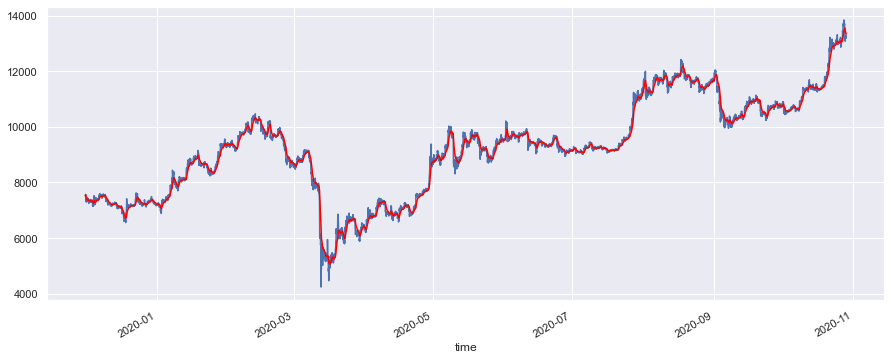

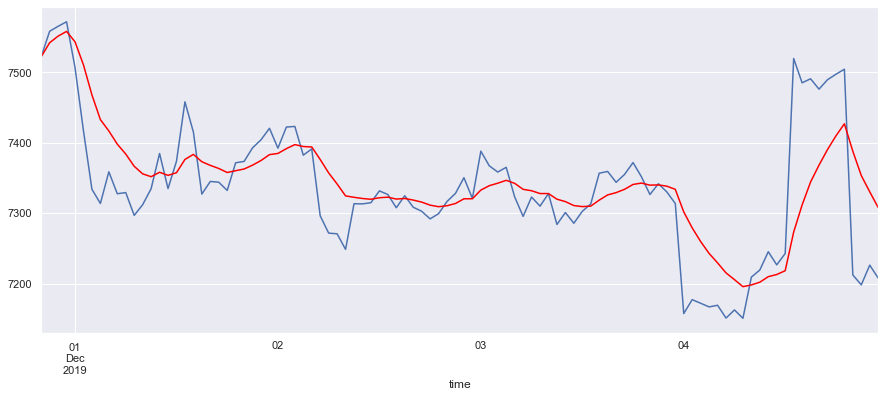

In [47]:
# plot original and transformed dataset
dataframe.close.plot()
dataframe.btc_48EMA.plot(color='red')
plt.show()

# zoomed plot original and transformed dataset
dataframe.close[:100].plot()
dataframe.btc_10EMA[:100].plot(color='red')
plt.show()

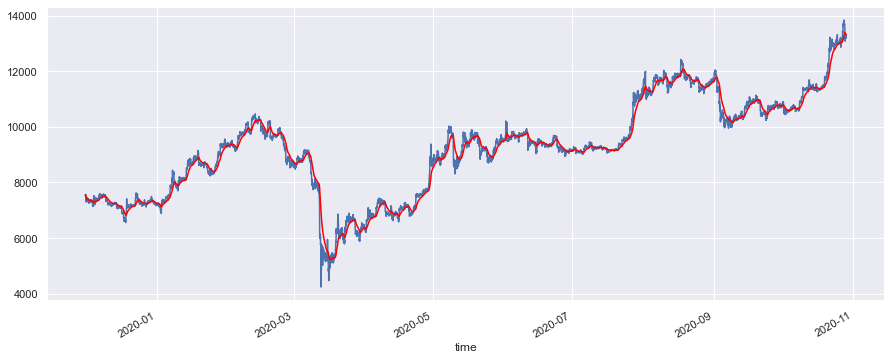

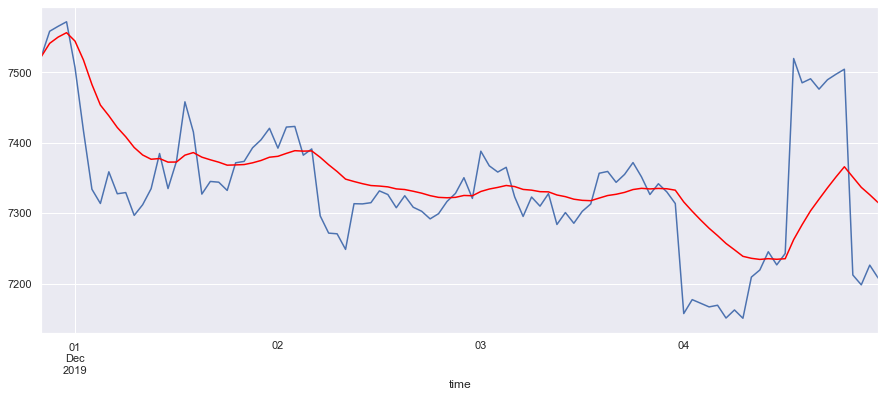

In [48]:
# plot original and transformed dataset
dataframe.close.plot()
dataframe.btc_96EMA.plot(color='red')
plt.show()

# zoomed plot original and transformed dataset
dataframe.close[:100].plot()
dataframe.btc_20EMA[:100].plot(color='red')
plt.show()

### More features

In [49]:
window = btc.close.expanding()
dataframe['min'] = window.min()
dataframe['max'] = window.max() 
dataframe['mean'] = window.mean() 
dataframe.head()

close     high      low     open  volumefrom    volumeto     LTC     ETH      t-1      t-2      t-3      t-4  t-5  t-6  t-7  \
time                                                                                                                                                 
2019-11-30 20:00:00  7522.12  7534.88  7503.92  7529.88      526.15  3960641.74  151.33  151.33      NaN      NaN      NaN      NaN  NaN  NaN  NaN   
2019-11-30 21:00:00  7558.29  7559.74  7519.95  7522.12      716.42  5409993.84  152.38  152.38  7522.12      NaN      NaN      NaN  NaN  NaN  NaN   
2019-11-30 22:00:00  7565.30  7586.43  7558.08  7558.29     1199.54  9098831.82  152.05  152.05  7558.29  7522.12      NaN      NaN  NaN  NaN  NaN   
2019-11-30 23:00:00  7571.77  7585.60  7561.41  7565.30      604.14  4583169.44  152.20  152.20  7565.30  7558.29  7522.12      NaN  NaN  NaN  NaN   
2019-12-01 00:00:00  7506.72  7575.50  7496.73  7571.77     1059.74  7990047.66  151.11  151.11  7571.77  7565.30  7558.29  7522.12  NaN  NaN  NaN   

                     t-8  day_of_week  day_of_month  hour  day_of_year  d_20     btc_5EMA    btc_10EMA    btc_20EMA    btc_48EMA    btc_96EMA  \
time                                                                                                                                            
2019-11-30 20:00:00  NaN            5            30    20          334   NaN  7522.120000  7522.120000  7522.120000  7522.120000  7522.120000   
2019-11-30 21:00:00  NaN            5            30    21          334   NaN  7543.822000  7542.013500  7541.109250  7540.807833  7540.506417   
2019-11-30 22:00:00  NaN            5            30    22          334   NaN  7553.995789  7551.374518  7549.991948  7549.522003  7549.047934   
2019-11-30 23:00:00  NaN            5            30    23          334   NaN  7561.378923  7558.093921  7556.278935  7555.652137  7555.015578   
2019-12-01 00:00:00  NaN            6             1     0          335   NaN  7540.396114  7543.345865  7544.291050  7544.518891  7544.701973   

                         min      max      mean  
time                                             
2019-11-30 20:00:00  7522.12  7522.12  7522.120  
2019-11-30 21:00:00  7522.12  7558.29  7540.205  
2019-11-30 22:00:00  7522.12  7565.30  7548.570  
2019-11-30 23:00:00  7522.12  7571.77  7554.370  
2019-12-01 00:00:00  7506.72  7571.77  7544.840

### Few more features

In [50]:
# creating features
dataframe['volume'] = dataframe['volumeto'] - dataframe['volumefrom']
dataframe.drop(columns = ['volumefrom', 'volumeto'], axis=1, inplace=True)
dataframe['HL_PCT'] = (dataframe['high'] - dataframe['low']) / dataframe['close'] * 100.0
dataframe['PCT_change'] = (dataframe['close'] - dataframe['open']) / dataframe['open'] * 100.0
dataframe.tail()

close      high       low      open       LTC     ETH       t-1       t-2       t-3       t-4       t-5       t-6       t-7  \
time                                                                                                                                                  
2020-10-28 22:00:00  13267.00  13285.31  13199.80  13202.98  13267.00  387.93  13202.98  13216.60  13173.94  13219.46  13193.33  13162.61  13237.39   
2020-10-28 23:00:00  13285.97  13314.62  13249.47  13267.00  13285.97  388.77  13267.00  13202.98  13216.60  13173.94  13219.46  13193.33  13162.61   
2020-10-29 00:00:00  13262.20  13314.58  13261.24  13285.97  13262.20  388.68  13285.97  13267.00  13202.98  13216.60  13173.94  13219.46  13193.33   
2020-10-29 01:00:00  13289.27  13299.94  13190.05  13262.20  13289.27  391.48  13262.20  13285.97  13267.00  13202.98  13216.60  13173.94  13219.46   
2020-10-29 02:00:00  13238.55  13292.53  13227.04  13289.27  13238.55  390.20  13289.27  13262.20  13285.97  13267.00  13202.98  13216.60  13173.94   

                          t-8  day_of_week  day_of_month  hour  day_of_year      d_20      btc_5EMA     btc_10EMA     btc_20EMA     btc_48EMA  \
time                                                                                                                                            
2020-10-28 22:00:00  13080.26            2            28    22          302  10903.57  13225.774466  13253.366271  13334.108263  13363.976354   
2020-10-28 23:00:00  13237.39            2            28    23          302  10929.40  13245.839644  13259.294222  13329.523667  13358.943686   
2020-10-29 00:00:00  13162.61            3            29     0          303  10884.34  13251.293096  13259.822545  13323.111889  13352.702157   
2020-10-29 01:00:00  13193.33            3            29     1          303  10903.85  13263.952064  13265.176628  13319.888852  13348.609760   
2020-10-29 02:00:00  13219.46            3            29     2          303  10905.79  13255.484709  13260.335423  13312.142294  13341.509131   

                        btc_96EMA      min       max         mean       volume    HL_PCT  PCT_change  
time                                                                                                  
2020-10-28 22:00:00  13330.940056  4240.69  13841.82  9209.242216  12695288.17  0.644532    0.484891  
2020-10-28 23:00:00  13329.465628  4240.69  13841.82  9209.751744  13683750.59  0.490367    0.142986  
2020-10-29 00:00:00  13327.260197  4240.69  13841.82  9210.258173   8972693.90  0.402196   -0.178911  
2020-10-29 01:00:00  13326.014617  4240.69  13841.82  9210.767858  11211306.78  0.826908    0.204114  
2020-10-29 02:00:00  13323.146925  4240.69  13841.82  9211.271079   3902454.80  0.494692   -0.381661

In [51]:
dataframe.shape

(8004, 30)

### Forecast column and label

In [52]:
dataframe.dropna(inplace=True)
fcast_col = 'close' # creating label
fcast_out = int(24) # prediction for next 24 hrs
print('length =', len(dataframe), "and forecast_out =", fcast_out); print()

dataframe['label'] = dataframe[fcast_col].shift(-fcast_out)
print('length =', len(dataframe), "and forecast_out =", fcast_out); print()
print(dataframe.head(2))
print('\n')
# If we look at the tail, it consists of n(=forecast_out) rows with NAN in Label column 
print(dataframe.tail(2)); 

length = 7524 and forecast_out = 24

length = 7524 and forecast_out = 24

                       close     high      low     open     LTC     ETH      t-1      t-2      t-3      t-4      t-5      t-6      t-7      t-8  \
time                                                                                                                                              
2019-12-20 20:00:00  7226.73  7234.56  7209.41  7214.07  128.67  128.67  7214.07  7209.63  7200.38  7180.98  7172.83  7214.25  7203.85  7199.83   
2019-12-20 21:00:00  7209.85  7229.22  7207.56  7226.73  128.40  128.40  7226.73  7214.07  7209.63  7200.38  7180.98  7172.83  7214.25  7203.85   

                     day_of_week  day_of_month  hour  day_of_year     d_20     btc_5EMA    btc_10EMA    btc_20EMA    btc_48EMA    btc_96EMA  \
time                                                                                                                                          
2019-12-20 20:00:00            4            20    2

In [53]:
from sklearn import preprocessing

columns = dataframe.drop(['label', 'close', 'open', 'high', 'low'], axis=1)

X = np.array(columns) # Define features Matrix X by excluding the label column which we just created 

X = preprocessing.scale(X)

"""
X contains last 'n= forecast_out' rows for which we don't have label data
Put those rows in different Matrix X_fcast_out by X_fcast_out = X[end-fcast_out:end]
"""

X_fcast_out = X[-fcast_out:]
X = X[:-fcast_out]

print ("Length of X_forecast_out:", len(X_fcast_out), "& Length of X :", len(X)); print()

# Similarly Define Label vector y for the data we have prediction for
# A good test is to make sure length of X and y are identical
y = np.array(dataframe['label'])
y = y[:-fcast_out]
print('Length of y: ',len(y))

<IPython.core.display.Javascript object>

Length of X_forecast_out: 24 & Length of X : 7500



<IPython.core.display.Javascript object>

Length of y:  7500


In [54]:
columns.shape

(7524, 26)

We can see that, the number of predictive features available in this dataset (23) is comparable to the number of records (6584).

### Time series split

In [55]:
from sklearn.model_selection import TimeSeriesSplit
# Split the data into train and test data set
tscv = TimeSeriesSplit();
#print(tscv);
TimeSeriesSplit();
for train_index, test_index in tscv.split(X):
    print("TRAIN:", train_index, "TEST:", test_index);
    X_train, X_test = X[train_index], X[test_index];
    y_train, y_test = y[train_index], y[test_index];

print('Observations: %d' % (len(X_train) + len(X_test)))
print('Training Observations: %d' % (len(X_train)))
print('Testing Observations: %d' % (len(X_test))) 


TRAIN: [   0    1    2 ... 1247 1248 1249] TEST: [1250 1251 1252 ... 2497 2498 2499]
TRAIN: [   0    1    2 ... 2497 2498 2499] TEST: [2500 2501 2502 ... 3747 3748 3749]
TRAIN: [   0    1    2 ... 3747 3748 3749] TEST: [3750 3751 3752 ... 4997 4998 4999]
TRAIN: [   0    1    2 ... 4997 4998 4999] TEST: [5000 5001 5002 ... 6247 6248 6249]
TRAIN: [   0    1    2 ... 6247 6248 6249] TEST: [6250 6251 6252 ... 7497 7498 7499]
Observations: 7500
Training Observations: 6250
Testing Observations: 1250


### Model fitting

Elasticnet provides a combination of Lasso and Ridge regularization

In [56]:
from sklearn.linear_model import LinearRegression, ElasticNet

alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]


"""
Regularisation by e.g. ℓ2 shrinkage: Introduce a bias in the solution by making (𝑋𝑇𝑋)−1
non-singular. Elastic net encourages a grouping effect, where strongly correlated predictors tend to
be in or out of the model together. Studies on real world data and simulation studies show that the elastic 
net often outperforms the lasso, while enjoying a similar sparsity of representation.
"""

for a in alphas:
    model = ElasticNet(alpha=a).fit(X_train,y_train)   
    score = model.score(X_train, y_train)
    pred_y = model.predict(X_train)
    mse = mean_squared_error(y_train, pred_y)   
    print("Alpha:{0:.4f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}"
       .format(a, score, mse, np.sqrt(mse)))

<IPython.core.display.Javascript object>

Alpha:0.0001, R2:0.97, MSE:85747.46, RMSE:292.83


<IPython.core.display.Javascript object>

Alpha:0.0010, R2:0.97, MSE:85876.33, RMSE:293.05


<IPython.core.display.Javascript object>

Alpha:0.0100, R2:0.97, MSE:86927.01, RMSE:294.83


<IPython.core.display.Javascript object>

Alpha:0.1000, R2:0.96, MSE:90815.45, RMSE:301.36


<IPython.core.display.Javascript object>

Alpha:0.3000, R2:0.96, MSE:93798.12, RMSE:306.26


<IPython.core.display.Javascript object>

Alpha:0.5000, R2:0.96, MSE:96300.73, RMSE:310.32


<IPython.core.display.Javascript object>

Alpha:0.7000, R2:0.96, MSE:98882.70, RMSE:314.46


<IPython.core.display.Javascript object>

Alpha:1.0000, R2:0.96, MSE:102901.53, RMSE:320.78


<IPython.core.display.Javascript object>

R2:0.839, MSE:130740.93, RMSE:361.58


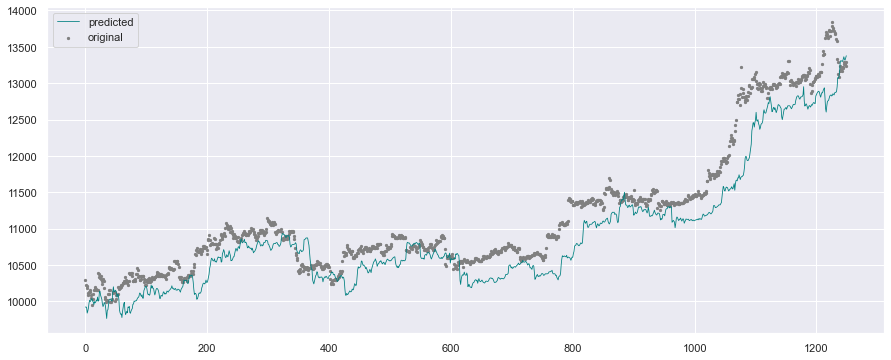

In [59]:
model1 = ElasticNet(alpha=0.0001).fit(X_train, y_train)
ypred = model1.predict(X_test)
score = model1.score(X_test, y_test)
mse = mean_squared_error(y_test, ypred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
      .format(score, mse, np.sqrt(mse)))
 

x_ax = range(len(X_test))
plt.scatter(x_ax, y_test, s=5, color="gray", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="teal", label="predicted")
plt.legend()
plt.show()

In [60]:
len(y_test)

1250

In [61]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, ypred)
print(mae)


295.92039593735274


### Features and coefficients

In [62]:
from sklearn.metrics import r2_score
# print R^2 for the training set
print('The R-squared value for the training set is: {:0.4f}'.format(r2_score(y_train, model1.predict(X_train))))

# print intercept and coefficients
param_df = DataFrame({"Coefficient": [model1.intercept_] + list(model1.coef_),
                         "Feature": ['intercept'] + list(columns)})
param_df[['Feature', 'Coefficient']]

The R-squared value for the training set is: 0.9655


Feature  Coefficient
0      intercept  9309.661792
1            LTC   -21.009375
2            ETH   188.462476
3            t-1  1292.369161
4            t-2    22.527504
5            t-3   -37.143100
6            t-4   -34.889056
7            t-5    43.815403
8            t-6   -28.162653
9            t-7   -89.915678
10           t-8   -49.681171
11   day_of_week   -31.853844
12  day_of_month    34.677141
13          hour     3.214172
14   day_of_year   -65.135096
15          d_20   -28.735497
16      btc_5EMA   307.141440
17     btc_10EMA   -86.314159
18     btc_20EMA     7.837350
19     btc_48EMA    92.896434
20     btc_96EMA   202.681105
21           min  -105.355209
22           max  -138.528933
23          mean   -57.357075
24        volume   -26.712966
25        HL_PCT    12.561968
26    PCT_change    42.131373

- The model performs very well on the training data to which it was fitted. (Predictions of the model account for 92.971% of the variance in prices.)  
- Let's check the model's performance on the test dataset

### Prediction & accuracy metrics

In [63]:
predicted = model1.predict(X_test)

r_squared = r2_score(y_test, predicted)
mae = np.mean(abs(predicted - y_test))
rmse = np.sqrt(np.mean((predicted - y_test)**2))
rae = np.mean(abs(predicted - y_test)) / np.mean(abs(y_test - np.mean(y_test)))
rse = np.mean((predicted - y_test)**2) / np.mean((y_test - np.mean(y_test))**2)

# Create a data frame for storing results from each model
summary_df = pd.DataFrame(index = ['R-squared', 'Mean Absolute Error', 'Root Mean Squared Error',
                                   'Relative Absolute Error', 'Relative Squared Error'])
summary_df['Regression, all variables'] = [r_squared, mae, rmse, rae, rse]
summary_df

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Regression, all variables
R-squared                                 0.839387
Mean Absolute Error                     295.920396
Root Mean Squared Error                 361.581158
Relative Absolute Error                   0.423509
Relative Squared Error                    0.160613

### Feature elimination

Optimal number of features: 1


<IPython.core.display.Javascript object>

Features selected: btc_5EMA
Suggested order of feature removal: HL_PCT, hour, t-5, volume, LTC, t-6, day_of_week, d_20, day_of_month, t-4, PCT_change, day_of_year, max, btc_96EMA, min, t-7, btc_48EMA, t-8, mean, ETH, btc_20EMA, t-3, btc_10EMA, t-2, t-1, btc_5EMA


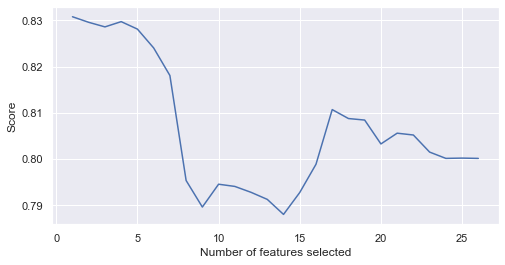

In [66]:
from sklearn.feature_selection import RFECV
import seaborn as sns

feature_names = columns.columns

# recursive feature elimination with cross validation, using r-squared score as metric
lm = ElasticNet(alpha = 0.01, random_state=0)  # using a linear model as before

"""
Regularisation by e.g. ℓ2 shrinkage: Introduce a bias in the solution by making (𝑋𝑇𝑋)−1
non-singular. Elastic net encourages a grouping effect, where strongly correlated predictors tend to
be in or out of the model together. Studies on real world data and simulation studies show that the elastic 
net often outperforms the lasso, while enjoying a similar sparsity of representation.
"""
rfecv = RFECV(estimator=lm, step=1, cv=5) 
rfecv.fit(X_train, y_train)

# print the optimal number of features
print('Optimal number of features: {}'.format(rfecv.n_features_))

# save the selected features
print('Features selected: {}'.format(', '.join(np.array(feature_names)[rfecv.support_].tolist())))

# get the feature elimination order
ranked_features, _ = zip(*sorted(zip(feature_names, rfecv.ranking_.tolist()),
                                 key=lambda x: x[1],
                                 reverse=True))
print('Suggested order of feature removal: {}'.format(', '.join(ranked_features)))

# plot number of features vs. scores
sns.set_style("darkgrid")
plt.figure(figsize=(8, 4))
plt.xlabel("Number of features selected")
plt.ylabel("Score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

### Validate Model with selected features 

In [67]:
X_train_subset = X_train[:, rfecv.support_]
lm2 = ElasticNet().fit(X_train_subset, y_train)

X_test_part = X_test[:, rfecv.support_]
predicted = lm2.predict(X_test_part)

r_squared = r2_score(y_test, predicted)
mae = np.mean(abs(predicted - y_test))
rmse = np.sqrt(np.mean((predicted - y_test)**2))
rae = np.mean(abs(predicted - y_test)) / np.mean(abs(y_test - np.mean(y_test)))
rse = np.mean((predicted - y_test)**2) / np.mean((y_test - np.mean(y_test))**2)

summary_df['Regression, selected variables'] = [r_squared, mae, rmse, rae, rse]
summary_df

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Regression, all variables  Regression, selected variables
R-squared                                 0.839387                       -0.132190
Mean Absolute Error                     295.920396                      868.149632
Root Mean Squared Error                 361.581158                      960.007955
Relative Absolute Error                   0.423509                        1.242460
Relative Squared Error                    0.160613                        1.132190

### Residuals plot on predicted
Residuals plot is to analyze the variance of the error of the regressor.

            0
0  579.326750
1  504.945500
2  492.930430
3  479.310038
4  411.290213


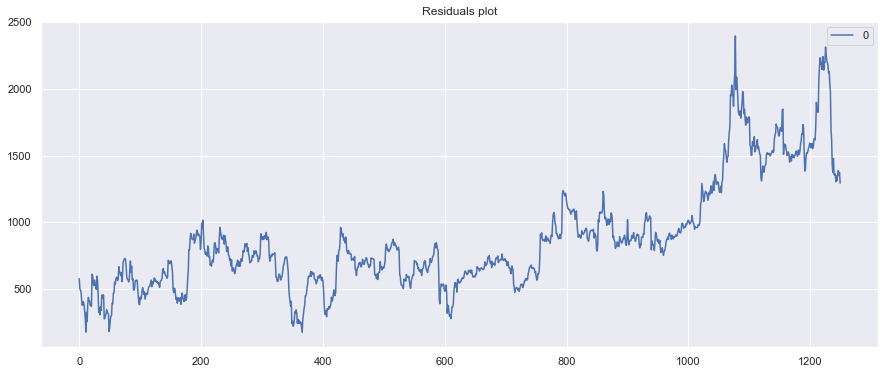

In [68]:
# calculate residuals
residuals = [y_test[i]-predicted[i] for i in range(len(predicted))]
residuals = DataFrame(residuals)
print(residuals.head())

# plot residuals
residuals.plot()
plt.title('Residuals plot')
plt.show()

Running the example shows a seemingly random plot of the residual time series.

- The residual data is the difference between the observed data of the outcome variable 𝑦 and the predicted
values 𝑦̂ 
𝑟𝑒𝑠𝑖𝑑𝑢𝑎𝑙 = 𝑦 − 𝑦̂
- The residuals plot should look “random” (no discernible pattern)
   - if the residuals are not random, they suggest that your model is systematically incorrect, meaning it can be improved


In [69]:
# summary statistics
print(residuals.describe())

                 0
count  1250.000000
mean    868.149632
std     409.958465
min     176.291823
25%     595.864047
50%     764.789340
75%     983.741573
max    2394.383559


Mean error value 57 (not close enough to zero). It suggests that there may be some bias and that we may be able to further improve the model by performing a bias correction. This could be done by adding the mean residual error (57.68)
to forecasts.

### Histogram & density plot of residuals

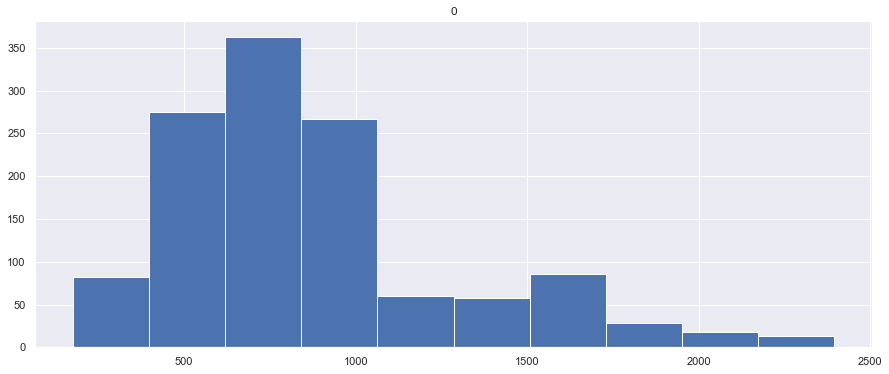

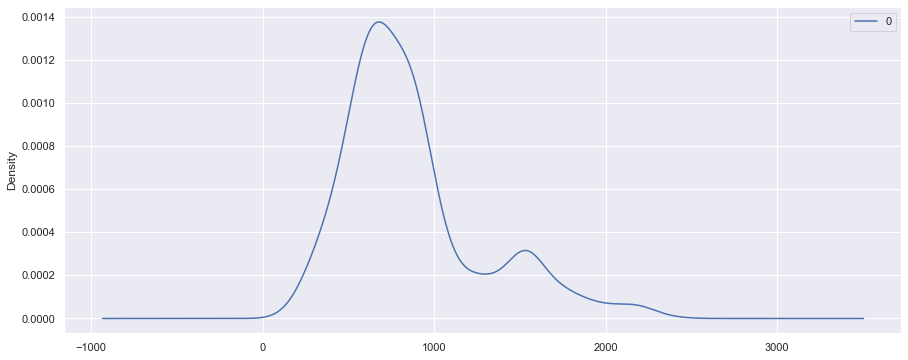

In [70]:
# histogram plot
residuals.hist()
plt.show()
# density plot
residuals.plot(kind='kde')
plt.show()

One assumption underlying linear regression is that the variance of the residuals is normally distributed (follows a Gaussian distribution).

The distribution does have a Gaussian look, showing an exponential distribution with some asymmetry. This confirms that that assumptions made by the modeling process seems in the right direction.

### Residual Autocorrelation

Our expectation here is to have any correlation between the residuals.

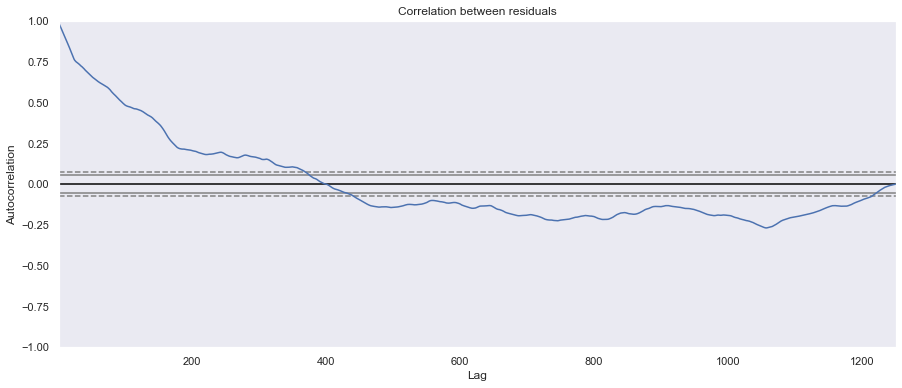

In [71]:
from pandas.plotting import autocorrelation_plot
residuals = DataFrame(residuals)
autocorrelation_plot(residuals)
plt.title('Correlation between residuals')
plt.show()

We see some significant autocorrelation trend across the plot.Significant autocorrelation in the residual plot suggests that the model good at incorporating the relationship between observations and lagged observations.

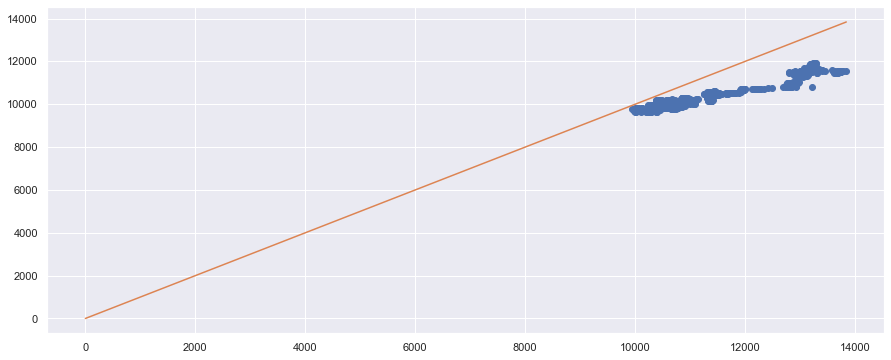

In [72]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.errorbar(y_test, predicted, fmt='o')
ax.errorbar([1, y_test.max()], [1, y_test.max()])
plt.show()

### Comparing actual and predicted values

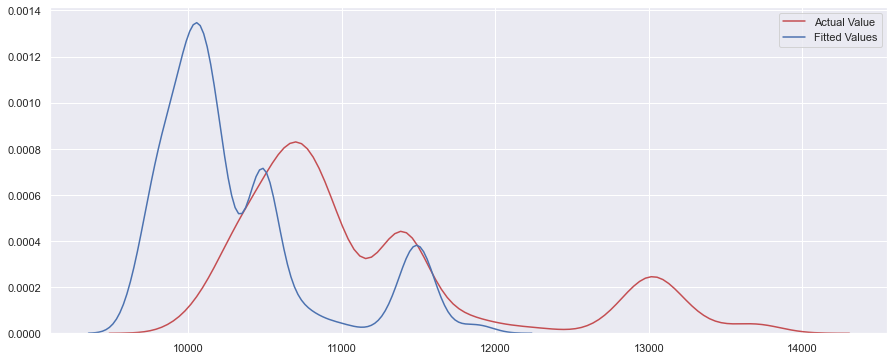

In [73]:
import seaborn as sns
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(predicted, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.show()

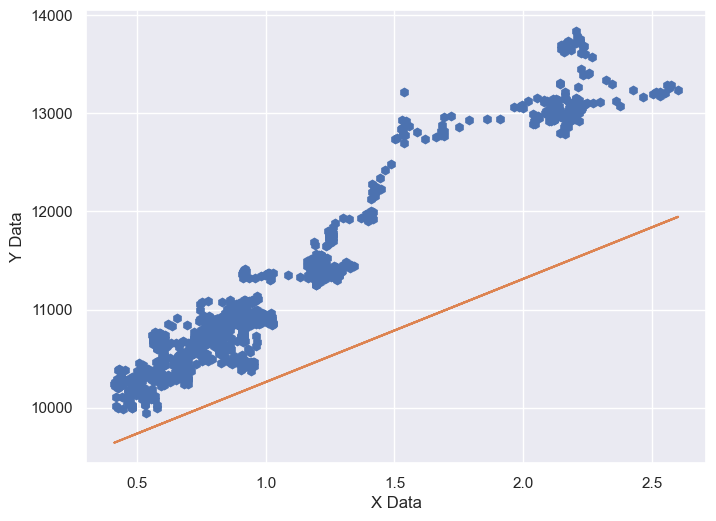

In [74]:
# graphics output section
def ModelAndScatterPlot(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    axes = f.add_subplot(111)

    # first the raw data as a scatter plot
    axes.plot(X_test_part, y_test,  'h')

    # now the model as a line plot
    axes.plot(X_test_part, predicted)

    axes.set_xlabel('X Data') # X axis data label
    axes.set_ylabel('Y Data') # Y axis data label

    plt.show()
    plt.close('all') # clean up after using pyplot

graphWidth = 800
graphHeight = 600
ModelAndScatterPlot(graphWidth, graphHeight)

### Actual vs prediction interactive plot

In [75]:
# actual vs prediction test

y_test = DataFrame(y_test) # actual
y_test.index = btc.index[-len(y_test):]
y_test.rename(columns = {0: 'Actual'}, inplace = True)
#y_test.tail()

from pandas import DataFrame, concat

# Actual vs prediction validation
predict = DataFrame(predicted) # prediction
predict.rename(columns = {0: 'Predicted'}, inplace = True)
predict.index = y_test.index

fig = go.Figure()
fig.add_trace(go.Scatter(x = btc['close'].index, y = btc['close'],
                         marker = dict(color = "red"), name = "Actual close price"))
fig.add_trace(go.Scatter(x = predict.index, y = predict['Predicted'], marker = dict(
        color = "green"), name = "Prediction"))
fig.update_xaxes(showline = True, linewidth = 2, linecolor = 'black', mirror = True, showspikes = True,)
fig.update_yaxes(showline = True, linewidth = 2, linecolor = 'black', mirror = True, showspikes = True,)
fig.update_layout(
    title= "Actual vs Prediction", 
    yaxis_title = 'BTC (US$)',
    hovermode = "x",
    hoverdistance = 100, # Distance to show hover label of data point
    spikedistance = 1000)
fig.update_layout(autosize = False, width = 1000, height = 400,)
fig.show()

# SELECTED PROGRAM FOR PRODUCTION

## Adding all together

###  <<<<1.0 of 4.0>>>>

In [76]:
from time import time
from pandas import DataFrame, concat
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from math import sqrt

!pip install pyforest
from pyforest import *
import datetime, pickle, copy
!pip install cryptocompare
import cryptocompare
import requests
!pip install plotly
!pip install cufflinks
import plotly.express as px
import plotly.graph_objects as go
from time import time
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn; seaborn.set()
from sklearn.metrics import mean_squared_error
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6
import warnings
warnings.filterwarnings("ignore")

In [113]:
start = time()

apiKey = "43b01c420b66888ce4c91b364647600814578c186e8604322152f44c641ebbc1"
url = "https://min-api.cryptocompare.com/data/histohour"

# BTC data
payload = {
    "api_key": apiKey,
    "fsym": "BTC",
    "tsym": "USD",
    "limit": 2000
}

result = requests.get(url, params=payload).json()

btc1 = DataFrame(result['Data'])
btc1['time'] = pd.to_datetime(btc1['time'],unit='s')
btc1.set_index('time',inplace=True)
btc1

# 2nd 2000 data
payload = {
    "api_key": apiKey,
    "fsym": "BTC",
    "tsym": "USD",
    "limit": 2000,
    "toTs": (1596736800)
}

result = requests.get(url, params=payload).json()

btc2 = DataFrame(result['Data'])
btc2['time'] = pd.to_datetime(btc2['time'],unit='s')
btc2.set_index('time',inplace=True)
btc2

# 3rd 2000 data
payload = {
    "api_key": apiKey,
    "fsym": "BTC",
    "tsym": "USD",
    "limit": 2000,
    "toTs": (1589540400)
}

result = requests.get(url, params=payload).json()

btc3 = DataFrame(result['Data'])
btc3['time'] = pd.to_datetime(btc3['time'],unit='s')
btc3.set_index('time',inplace=True)

# 4th 2000 data
payload = {
    "api_key": apiKey,
    "fsym": "BTC",
    "tsym": "USD",
    "limit": 2000,
    "toTs": (1582344000)
}

result = requests.get(url, params=payload).json()

btc4 = DataFrame(result['Data'])
btc4['time'] = pd.to_datetime(btc4['time'],unit='s')
btc4.set_index('time',inplace=True)

# combining BTC dataframe
com1 = btc2.append(btc1)
com2 = btc3.append(com1)
btc = btc4.append(com2)
# saving btc data set
btc.to_csv("bitcoin.csv")


# ETH DATA
payload = {
    "api_key": apiKey,
    "fsym": "ETH",
    "tsym": "USD",
    "limit": 2000
}

result = requests.get(url, params=payload).json()
eth1 = DataFrame(result['Data'])
eth1['time'] = pd.to_datetime(eth1['time'],unit='s')
eth1.set_index('time',inplace=True)

# 2nd 2000 data
payload = {
    "api_key": apiKey,
    "fsym": "ETH",
    "tsym": "USD",
    "limit": 2000,
    "toTs": (1596736800)
}

result = requests.get(url, params=payload).json()
eth2 = DataFrame(result['Data'])
eth2['time'] = pd.to_datetime(eth2['time'],unit='s')
eth2.set_index('time',inplace=True)

# 3rd 2000 data
payload = {
    "api_key": apiKey,
    "fsym": "ETH",
    "tsym": "USD",
    "limit": 2000,
    "toTs": (1589540400)
}

result = requests.get(url, params=payload).json()
eth3 = DataFrame(result['Data'])
eth3['time'] = pd.to_datetime(eth3['time'],unit='s')
eth3.set_index('time',inplace=True)

# 4th ETH 2000 data
payload = {
    "api_key": apiKey,
    "fsym": "ETH",
    "tsym": "USD",
    "limit": 2000,
    "toTs": (1582344000)
}

result = requests.get(url, params=payload).json()

eth4 = DataFrame(result['Data'])
eth4['time'] = pd.to_datetime(eth4['time'],unit='s')
eth4.set_index('time',inplace=True)

# combining BTC dataframe
com1 = eth2.append(eth1)
com2 = eth3.append(com1)
eth = eth4.append(com2)
print(eth)
# saving ETH data set
eth.to_csv("Ethereum.csv")

# LTC data
payload = {
    "api_key": apiKey,
    "fsym": "LTC",
    "tsym": "USD",
    "limit": 2000
}
result = requests.get(url, params=payload).json()
ltc1 = DataFrame(result['Data'])
ltc1['time'] = pd.to_datetime(ltc1['time'],unit='s')
ltc1.set_index('time',inplace=True)

# 2nd 2000 data
payload = {
    "api_key": apiKey,
    "fsym": "LTC",
    "tsym": "USD",
    "limit": 2000,
    "toTs": (1596736800)
}

result = requests.get(url, params=payload).json()
ltc2 = DataFrame(result['Data'])
ltc2['time'] = pd.to_datetime(ltc2['time'],unit='s')
ltc2.set_index('time',inplace=True)

# 3rd 2000 data
payload = {
    "api_key": apiKey,
    "fsym": "LTC",
    "tsym": "USD",
    "limit": 2000,
    "toTs": (1589540400)
}

result = requests.get(url, params=payload).json()
ltc3 = DataFrame(result['Data'])
ltc3['time'] = pd.to_datetime(ltc3['time'],unit='s')
ltc3.set_index('time',inplace=True)

# 4th ETH 2000 data
payload = {
    "api_key": apiKey,
    "fsym": "ETH",
    "tsym": "USD",
    "limit": 2000,
    "toTs": (1582344000)
}

result = requests.get(url, params=payload).json()

ltc4 = DataFrame(result['Data'])
ltc4['time'] = pd.to_datetime(ltc4['time'],unit='s')
ltc4.set_index('time',inplace=True)

# combining dataframe
com1 = ltc2.append(ltc1)
com2 = ltc3.append(com1)
ltc = ltc4.append(com2)

# saving ETH data set
ltc.to_csv("litecoin.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

                      close    high     low    open  volumefrom    volumeto
time                                                                       
2019-11-30 20:00:00  151.33  151.48  150.68  151.05     3192.74   482628.97
2019-11-30 21:00:00  152.38  152.38  151.29  151.33     6868.16  1044041.74
2019-11-30 22:00:00  152.05  153.16  152.02  152.38     9832.95  1499608.13
2019-11-30 23:00:00  152.20  152.73  152.02  152.05     4889.97   746412.82
2019-12-01 00:00:00  151.11  152.20  150.95  152.20     4348.47   657027.45
...                     ...     ...     ...     ...         ...         ...
2020-10-29 03:00:00  392.00  392.00  389.35  391.05     4783.98  1867825.70
2020-10-29 04:00:00  390.81  392.25  390.80  392.00     4737.31  1854225.30
2020-10-29 05:00:00  392.07  392.11  390.65  390.81     4164.14  1629375.88
2020-10-29 06:00:00  391.05  392.31  390.87  392.07     4774.13  1869468.30
2020-10-29 07:00:00  388.70  392.17  388.25  391.05     6634.08  2588670.21

[8004 rows 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [114]:
# --Data Selection
from pandas import DataFrame, concat

df = DataFrame({'LTC': ltc.close,'ETH': eth.close})
dataframe = concat([btc, df], axis=1)

In [116]:
# --Data Selection
from pandas import DataFrame, concat

df = DataFrame({'LTC': ltc.close,'ETH': eth.close})
dataframe = concat([btc, df], axis=1)

values = DataFrame(btc.close.values)
lags = 8
columns = [values]
for i in range(1,(lags + 1)):
    columns.append(values.shift(i))
dt = concat(columns, axis=1)
columns = ['t']
for i in range(1,(lags + 1)):
    columns.append('t' + str(i))
dt.columns = columns
dt.index = dataframe.index
dataframe = concat([dataframe, dt], axis=1)
#dataframe.tail()

dataframe.dropna(inplace=True)
dataframe['day_of_month'] = dataframe.index.day
dataframe['day_of_year'] = dataframe.index.dayofyear
dataframe['day_of_week'] = dataframe.index.dayofweek
dataframe['d_20'] = dataframe['close'].shift(480)
dataframe['5EMA'] = (dataframe['close'].ewm(span=5,adjust=True,ignore_na=True).mean())
dataframe['10EMA'] = (dataframe['close'].ewm(span=10,adjust=True,ignore_na=True).mean())
dataframe['20EMA'] = (dataframe['close'].ewm(span=20,adjust=True,ignore_na=True).mean())
dataframe['48EMA'] = (dataframe['close'].ewm(span=10,adjust=True,ignore_na=True).mean())
dataframe['96EMA'] = (dataframe['close'].ewm(span=20,adjust=True,ignore_na=True).mean())
#dataframe = dataframe.drop(['close', 'open', 'high', 'low', 'volumefrom', 'volumeto'], axis=1)

# save
#dataframe.to_csv('btc_hr.csv', header=True)

dataframe['HL_PCT'] = (dataframe['high'] - dataframe['low']) / dataframe['close'] * 100.0
dataframe['PCT_change'] = (dataframe['close'] - dataframe['open']) / dataframe['open'] * 100.0
dataframe['volume'] = dataframe['volumeto'] - dataframe['volumefrom']
dataframe['hour'] = dataframe.index.hour
dataframe.dropna(inplace=True)
dataframe = dataframe[['LTC','ETH','t1','t2','t3','t4','t5','t6','t7','t8','day_of_week','day_of_month', 
                       'hour','day_of_year','d_20','5EMA','10EMA','20EMA','48EMA', 
                       '96EMA','volume','HL_PCT','PCT_change', 'close']]

fcast_col = 'close' # creating label
fcast_out = int(24) # prediction for next 24 hrs
dataframe['label'] = dataframe[fcast_col].shift(-fcast_out)

X = np.array(dataframe.drop(['label'], axis=1))

from sklearn import preprocessing
X = preprocessing.scale(X)
X_fcast_out = X[-fcast_out:]
X = X[:-fcast_out]
#dataframe.dropna(inplace=True)
y = np.array(dataframe['label'])

from sklearn.model_selection import TimeSeriesSplit
# Split the data into train and test data set
tscv = TimeSeriesSplit();
TimeSeriesSplit();
for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index];
    y_train, y_test = y[train_index], y[test_index];
    
from sklearn.linear_model import LinearRegression, ElasticNet
        
# regression model
lm = ElasticNet(alpha = 0.01, random_state=0).fit(X_train, y_train)

#import sklearn.externals
#import joblib

# Save model to file in the current working directory
#joblib_file = "joblib_Model.pkl"  
#joblib.dump(lm, joblib_file)

# Load from file
#joblib_model = joblib.load(joblib_file)


from sklearn.metrics import r2_score
tr_pred = lm.predict(X_train)
r_squared = r2_score(y_train, tr_pred)
mae = np.mean(abs(tr_pred - y_train))
rmse = np.sqrt(np.mean((tr_pred - y_train)**2))
rae = np.mean(abs(tr_pred - y_train)) / np.mean(abs(y_train - np.mean(y_train)))
rse = np.mean((tr_pred - y_train)**2) / np.mean((y_train - np.mean(y_train))**2)
sum_df = DataFrame(index = ['R-squared', 'Mean Absolute Error', 'Root Mean Squared Error',
                                'Relative Absolute Error', 'Relative Squared Error'])
sum_df['Training metrics'] = [r_squared, mae, rmse, rae, rse]

te_pred = lm.predict(X_test)
r_squared = r2_score(y_test, te_pred)
mae = np.mean(abs(te_pred - y_test))
rmse = np.sqrt(np.mean((te_pred - y_test)**2))
rae = np.mean(abs(te_pred - y_test)) / np.mean(abs(y_test - np.mean(y_test)))
rse = np.mean((te_pred - y_test)**2) / np.mean((y_test - np.mean(y_test))**2)

sum_df['Validation metrics'] = [r_squared, mae, rmse, rae, rse]
sum_df= sum_df.round(decimals=3)
print(sum_df)

#from sklearn.metrics import mean_absolute_error
#mae = mean_absolute_error(y_test, ypred)

# calculate residuals
residuals = [y_test[i]-te_pred[i] for i in range(len(te_pred))]
residuals = DataFrame(residuals)
error = residuals.mean()

# saving error
np.save('lm_err.npy', [error])

# actual vs prediction test

y_test = DataFrame(y_test) # actual
y_test.index = btc.index[-len(y_test):]
y_test.rename(columns = {0: 'Actual'}, inplace = True)
#y_test.tail()

from pandas import DataFrame, concat

# Actual vs prediction validation
predict = DataFrame(lm.predict(X_test)) # prediction
predict.rename(columns = {0: 'Predicted'}, inplace = True)
predict.index = y_test.index


fig = go.Figure()
fig.add_trace(go.Scatter(x = btc['close'].index, y = btc['close'],
                         marker = dict(color = "red"), name = "Actual close price"))
fig.add_trace(go.Scatter(x = predict.index, y = predict['Predicted'], marker = dict(
        color = "green"), name = "Prediction"))
fig.update_xaxes(showline = True, linewidth = 2, linecolor = 'black', mirror = True, showspikes = True,)
fig.update_yaxes(showline = True, linewidth = 2, linecolor = 'black', mirror = True, showspikes = True,)
fig.update_layout(
    title= "Actual vs Prediction", 
    yaxis_title = 'BTC (US$)',
    hovermode = "x",
    hoverdistance = 100, # Distance to show hover label of data point
    spikedistance = 1000)
fig.update_layout(autosize = False, width = 1000, height = 400,)
fig.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

                         Training metrics  Validation metrics
R-squared                           0.964               0.925
Mean Absolute Error               201.165             184.817
Root Mean Squared Error           299.989             249.410
Relative Absolute Error             0.166               0.262
Relative Squared Error              0.036               0.075


<IPython.core.display.Javascript object>

### <<<2.0 of 4.0>>>

In [117]:
# loading model to make prediction
fcast1 = DataFrame(lm.predict(X_fcast_out)); #set that will contain the forecasted data
#err = np.load('lm_err.npy')
fcast1 = fcast1 + mae # adding residual error

# assigning names to columns
fcast1.rename(columns = {0: 'Forecast'}, inplace = True)
d = btc.tail(fcast_out)
d.reset_index(inplace = True)
d = d.append(DataFrame({'time': pd.date_range(start = d.time.iloc[-1], 
                                             periods = (len(d)+1), freq = 'H', closed = 'right')}))
d.set_index('time', inplace = True)
d = d.tail(fcast_out)
fcast1.index = d.index
print('24 hours forecast (hourly):')
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

fcast1.style.apply(highlight_max)

<IPython.core.display.Javascript object>

24 hours forecast (hourly):


### <<<3.0 of 4.0>>>

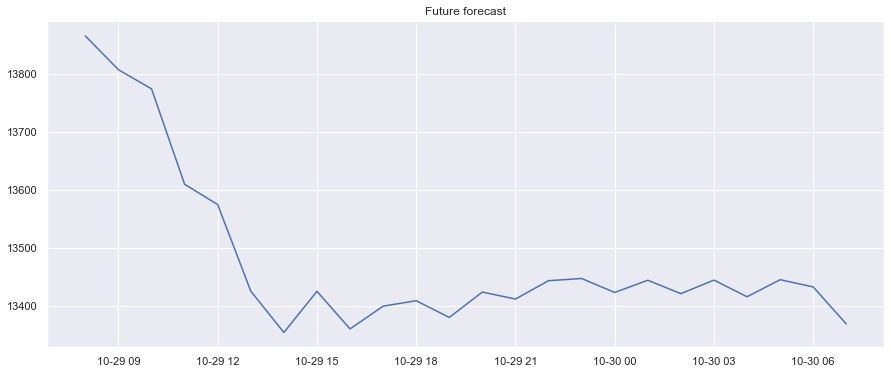

In [118]:
plt.plot(fcast1.Forecast)
plt.title('Future forecast')
plt.show()

### <<<4.0 of 4.0>>>

In [119]:
fcast1.reset_index(inplace=True)
fig = go.Figure()
n = fcast1.time[0]
fig.add_trace(go.Scatter(x = btc.index[-200:], y = btc.close[-200:],
                         marker = dict(color = "red"), name = "Actual close price"))
fig.add_trace(go.Scatter(x = fcast1['time'], y = fcast1['Forecast'], marker = dict(
        color = "green"), name = "Future prediction"))
fig.update_xaxes(showline = True, linewidth = 2, linecolor = 'black', mirror = True, showspikes = True,)
fig.update_yaxes(showline = True, linewidth = 2, linecolor = 'black', mirror = True, showspikes = True,)
fig.update_layout(
    title= "24 hrs close Price Forecast", 
    yaxis_title = 'BTC (US$)',
    hovermode = "x",
    hoverdistance = 100, # Distance to show hover label of data point
    spikedistance = 1000,
    shapes = [dict(x0 = n, x1 = n, y0 = 0, y1 = 1, xref = 'x', yref = 'paper', line_width = 2)],
    annotations = [dict(x = n, y = 0.05, xref = 'x', yref = 'paper', showarrow = False, 
                        xanchor = 'left', text = 'Prediction')])
fig.update_layout(autosize = False, width = 1000, height = 400)
fig.show()

elapse = time() - start
print('Time elapsed:, ', elapse)

print("<<<<< end program for production >>>>")

Time elapsed:,  80.79301023483276
<<<<< end program for production >>>>


## Light GBM (non-linear)

In [81]:
print("....program starting''''''")

apiKey = "43b01c420b66888ce4c91b364647600814578c186e8604322152f44c641ebbc1"
url = "https://min-api.cryptocompare.com/data/histohour"

# BTC data
payload = {
    "api_key": apiKey,
    "fsym": "BTC",
    "tsym": "USD",
    "limit": 2000
}

result = requests.get(url, params=payload).json()

btc1 = DataFrame(result['Data'])
btc1['time'] = pd.to_datetime(btc1['time'],unit='s')
btc1.set_index('time',inplace=True)

# 2nd 2000 data
x = btc1.index[0].strftime("%Y%m%d%H")
payload = {
    "api_key": apiKey,
    "fsym": "BTC",
    "tsym": "USD",
    "limit": 2000,
    "toTs": (x)
}

result = requests.get(url, params=payload).json()

btc2 = DataFrame(result['Data'])
btc2['time'] = pd.to_datetime(btc2['time'],unit='s')
btc2.set_index('time',inplace=True)

# 3rd 2000 data
y = btc2.index[0].strftime("%Y%m%d%H")
payload = {
    "api_key": apiKey,
    "fsym": "BTC",
    "tsym": "USD",
    "limit": 2000,
    "toTs": (y)
}

result = requests.get(url, params=payload).json()

btc3 = DataFrame(result['Data'])
btc3['time'] = pd.to_datetime(btc3['time'],unit='s')
btc3.set_index('time',inplace=True)

# 4th 2000 data
z = btc3.index[0].strftime("%Y%m%d%H")
payload = {
    "api_key": apiKey,
    "fsym": "BTC",
    "tsym": "USD",
    "limit": 2000,
    "toTs": (z)
}

result = requests.get(url, params=payload).json()

btc4 = DataFrame(result['Data'])
btc4['time'] = pd.to_datetime(btc4['time'],unit='s')
btc4.set_index('time',inplace=True)

# combining BTC dataframe
com1 = btc2.append(btc1)
com2 = btc3.append(com1)
btc = btc4.append(com2)

# ETH data
payload = {
    "api_key": apiKey,
    "fsym": "ETH",
    "tsym": "USD",
    "limit": 2000
}

result = requests.get(url, params=payload).json()
eth1 = DataFrame(result['Data'])
eth1['time'] = pd.to_datetime(eth1['time'],unit='s')
eth1.set_index('time',inplace=True)

# 2nd 2000 data
x = eth1.index[0].strftime("%Y%m%d%H")
payload = {
    "api_key": apiKey,
    "fsym": "ETH",
    "tsym": "USD",
    "limit": 2000,
    "toTs": (x)
}

result = requests.get(url, params=payload).json()
eth2 = DataFrame(result['Data'])
eth2['time'] = pd.to_datetime(eth2['time'],unit='s')
eth2.set_index('time',inplace=True)

# 2rd 2000 data
y = eth2.index[0].strftime("%Y%m%d%H")
payload = {
    "api_key": apiKey,
    "fsym": "ETH",
    "tsym": "USD",
    "limit": 2000,
    "toTs": (y)
}

result = requests.get(url, params=payload).json()
eth3 = DataFrame(result['Data'])
eth3['time'] = pd.to_datetime(eth3['time'],unit='s')
eth3.set_index('time',inplace=True)

# 4th ETH 2000 data
z = eth3.index[0].strftime("%Y%m%d%H")
payload = {
    "api_key": apiKey,
    "fsym": "ETH",
    "tsym": "USD",
    "limit": 2000,
    "toTs": (z)
}

result = requests.get(url, params=payload).json()

eth4 = DataFrame(result['Data'])
eth4['time'] = pd.to_datetime(eth4['time'],unit='s')
eth4.set_index('time',inplace=True)

# combining dataframe
com1 = eth2.append(eth1)
com2 = eth3.append(com1)
eth = eth4.append(com2)

# LTC data
payload = {
    "api_key": apiKey,
    "fsym": "LTC",
    "tsym": "USD",
    "limit": 2000
}
result = requests.get(url, params=payload).json()
ltc1 = DataFrame(result['Data'])
ltc1['time'] = pd.to_datetime(ltc1['time'],unit='s')
ltc1.set_index('time',inplace=True)

# 2nd 2000 data
x = ltc1.index[0].strftime("%Y%m%d%H")
payload = {
    "api_key": apiKey,
    "fsym": "LTC",
    "tsym": "USD",
    "limit": 2000,
    "toTs": (x)
}

result = requests.get(url, params=payload).json()
ltc2 = DataFrame(result['Data'])
ltc2['time'] = pd.to_datetime(ltc2['time'],unit='s')
ltc2.set_index('time',inplace=True)

# 2rd 2000 data
y = ltc2.index[0].strftime("%Y%m%d%H")
payload = {
    "api_key": apiKey,
    "fsym": "LTC",
    "tsym": "USD",
    "limit": 2000,
    "toTs": (y)
}

result = requests.get(url, params=payload).json()
ltc3 = DataFrame(result['Data'])
ltc3['time'] = pd.to_datetime(ltc3['time'],unit='s')
ltc3.set_index('time',inplace=True)

# 4th ETH 2000 data
z = ltc3.index[0].strftime("%Y%m%d%H")
payload = {
    "api_key": apiKey,
    "fsym": "ETH",
    "tsym": "USD",
    "limit": 2000,
    "toTs": (z)
}

result = requests.get(url, params=payload).json()

ltc4 = DataFrame(result['Data'])
ltc4['time'] = pd.to_datetime(ltc4['time'],unit='s')
ltc4.set_index('time',inplace=True)

# combining dataframe
com1 = ltc2.append(ltc1)
com2 = ltc3.append(com1)
ltc = ltc4.append(com2)

# --Data Selection
from pandas import DataFrame, concat

df = DataFrame({'LTC': ltc.close,'ETH': eth.close})
dataframe = concat([btc, df], axis=1)

values = DataFrame(btc.close.values)
lags = 8
columns = [values]
for i in range(1,(lags + 1)):
    columns.append(values.shift(i))
dt = concat(columns, axis=1)
columns = ['t']
for i in range(1,(lags + 1)):
    columns.append('t' + str(i))
dt.columns = columns
dt.index = dataframe.index
dataframe = concat([dataframe, dt], axis=1)
#dataframe.tail()

dataframe.dropna(inplace=True)
dataframe['day_of_month'] = dataframe.index.day
dataframe['day_of_year'] = dataframe.index.dayofyear
dataframe['day_of_week'] = dataframe.index.dayofweek
dataframe['d_20'] = dataframe['close'].shift(480)
dataframe['5EMA'] = (dataframe['close'].ewm(span=5,adjust=True,ignore_na=True).mean())
dataframe['10EMA'] = (dataframe['close'].ewm(span=10,adjust=True,ignore_na=True).mean())
dataframe['20EMA'] = (dataframe['close'].ewm(span=20,adjust=True,ignore_na=True).mean())
dataframe['48EMA'] = (dataframe['close'].ewm(span=10,adjust=True,ignore_na=True).mean())
dataframe['96EMA'] = (dataframe['close'].ewm(span=20,adjust=True,ignore_na=True).mean())
#dataframe = dataframe.drop(['close', 'open', 'high', 'low', 'volumefrom', 'volumeto'], axis=1)

# save
#dataframe.to_csv('btc_hr.csv', header=True)

dataframe['HL_PCT'] = (dataframe['high'] - dataframe['low']) / dataframe['close'] * 100.0
dataframe['PCT_change'] = (dataframe['close'] - dataframe['open']) / dataframe['open'] * 100.0
dataframe['volume'] = dataframe['volumeto'] - dataframe['volumefrom']
dataframe['hour'] = dataframe.index.hour
dataframe.dropna(inplace=True)
dataframe = dataframe[['LTC','ETH','t1','t2','t3','t4','t5','t6','t7','t8','day_of_week','day_of_month', 
                       'hour','day_of_year','d_20','5EMA','10EMA','20EMA','48EMA', 
                       '96EMA','volume','HL_PCT','PCT_change', 'close']]

fcast_col = 'close' # creating label
fcast_out = int(24) # prediction for next 24 hrs
dataframe['label'] = dataframe[fcast_col].shift(-fcast_out)

X = np.array(dataframe.drop(['label'], axis=1))

from sklearn import preprocessing
X = preprocessing.scale(X)
X_fcast_out = X[-fcast_out:]
X = X[:-fcast_out]
#dataframe.dropna(inplace=True)
y = np.array(dataframe['label'])

from sklearn.model_selection import TimeSeriesSplit
# Split the data into train and test data set
tscv = TimeSeriesSplit();
TimeSeriesSplit();
for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index];
    y_train, y_test = y[train_index], y[test_index];

    
import lightgbm as lgb 
from lightgbm import LGBMRegressor
lgb = LGBMRegressor(objective='regression', max_depth=45, max_features='sqrt', 
                      min_samples_split=5, n_estimators=200, 
                      random_state=42).fit(X_train, y_train)


from sklearn import metrics
tr_pred = lgb.predict(X_train)
r_squared = r2_score(y_train, tr_pred)
mae = np.mean(abs(tr_pred - y_train))
rmse = np.sqrt(np.mean((tr_pred - y_train)**2))
rae = np.mean(abs(tr_pred - y_train)) / np.mean(abs(y_train - np.mean(y_train)))
rse = np.mean((tr_pred - y_train)**2) / np.mean((y_train - np.mean(y_train))**2)
summary_df = DataFrame(index = ['R-squared', 'Mean Absolute Error', 'Root Mean Squared Error',
                                'Relative Absolute Error', 'Relative Squared Error'])
summary_df['Training metrics'] = [r_squared, mae, rmse, rae, rse]

te_pred = lgb.predict(X_test)
r_squared = r2_score(y_test, te_pred)
mae = np.mean(abs(te_pred - y_test))
rmse = np.sqrt(np.mean((te_pred - y_test)**2))
rae = np.mean(abs(te_pred - y_test)) / np.mean(abs(y_test - np.mean(y_test)))
rse = np.mean((te_pred - y_test)**2) / np.mean((y_test - np.mean(y_test))**2)

summary_df['Validation metrics'] = [r_squared, mae, rmse, rae, rse]
print(summary_df)



....program starting''''''


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

                         Training metrics  Validation metrics
R-squared                        0.999547            0.999657
Mean Absolute Error             12.348812           12.320808
Root Mean Squared Error         16.673053           16.706837
Relative Absolute Error          0.019877            0.017632
Relative Squared Error           0.000453            0.000343


In [82]:
# actual vs prediction test
y_test = DataFrame(y_test) # actual
y_test.index = btc.index[-len(y_test):]
y_test.rename(columns = {0: 'Actual'}, inplace = True)

from pandas import DataFrame, concat

# Actual vs prediction validation
predict = DataFrame(te_pred) # prediction
predict.rename(columns = {0: 'Predicted'}, inplace = True)
predict.index = y_test.index


fig = go.Figure()
fig.add_trace(go.Scatter(x = btc['close'].index, y = btc['close'],
                         marker = dict(color = "red"), name = "Actual close price"))
fig.add_trace(go.Scatter(x = predict.index, y = predict['Predicted'], marker = dict(
        color = "green"), name = "Prediction"))
fig.update_xaxes(showline = True, linewidth = 2, linecolor = 'black', mirror = True, showspikes = True,)
fig.update_yaxes(showline = True, linewidth = 2, linecolor = 'black', mirror = True, showspikes = True,)
fig.update_layout(
    title= "Actual vs Prediction", 
    yaxis_title = 'BTC (US$)',
    hovermode = "x",
    hoverdistance = 100, # Distance to show hover label of data point
    spikedistance = 1000)
fig.update_layout(autosize = False, width = 1000, height = 400)
fig.show()


# forecast future values
fcast2 = DataFrame(lgb.predict(X_fcast_out)); #set that will contain the forecasted data
                        
# assigning names to columns
fcast2.rename(columns = {0: 'Forecast'}, inplace = True)
d = btc.tail(fcast_out)
d.reset_index(inplace = True)
d = d.append(DataFrame({'time': pd.date_range(start = d.time.iloc[-1], 
                                             periods = (len(d)+1), freq = 'H', closed = 'right')}))
d.set_index('time', inplace = True)
d = d.tail(fcast_out)
fcast2.index = d.index
fcast2.reset_index(inplace=True)
print('72 hours forecast (hourly):')
print(fcast2); 

fig = go.Figure()
n = fcast2.time[0]
fig.add_trace(go.Scatter(x = btc.index[-200:], y = btc.close[-200:],
                         marker = dict(color = "red"), name = "Actual close price"))
fig.add_trace(go.Scatter(x = fcast2['time'], y = fcast2['Forecast'], marker = dict(
        color = "green"), name = "Future prediction"))
fig.update_xaxes(showline = True, linewidth = 2, linecolor = 'black', mirror = True, showspikes = True,)
fig.update_yaxes(showline = True, linewidth = 2, linecolor = 'black', mirror = True, showspikes = True,)
fig.update_layout(
    title= "72 hrs close Price Forecast", 
    yaxis_title = 'BTC (US$)',
    hovermode = "x",
    hoverdistance = 100, # Distance to show hover label of data point
    spikedistance = 1000,
    shapes = [dict(x0 = n, x1 = n, y0 = 0, y1 = 1, xref = 'x', yref = 'paper', line_width = 2)],
    annotations = [dict(x = n, y = 0.05, xref = 'x', yref = 'paper', showarrow = False, 
                        xanchor = 'left', text = 'Prediction')])
fig.update_layout(autosize = False, width = 1000, height = 400,)
fig.show()


<IPython.core.display.Javascript object>

72 hours forecast (hourly):
                  time      Forecast
0  2020-10-29 03:00:00  11875.060253
1  2020-10-29 04:00:00  11898.500117
2  2020-10-29 05:00:00  11848.088178
3  2020-10-29 06:00:00  11788.340232
4  2020-10-29 07:00:00  11746.660893
5  2020-10-29 08:00:00  11766.865893
6  2020-10-29 09:00:00  11777.644798
7  2020-10-29 10:00:00  11863.492903
8  2020-10-29 11:00:00  11864.874669
9  2020-10-29 12:00:00  11833.044930
10 2020-10-29 13:00:00  11825.669796
11 2020-10-29 14:00:00  11762.123868
12 2020-10-29 15:00:00  11823.885010
13 2020-10-29 16:00:00  11791.980110
14 2020-10-29 17:00:00  11834.182399
15 2020-10-29 18:00:00  11816.765999
16 2020-10-29 19:00:00  11798.799722
17 2020-10-29 20:00:00  11757.317780
18 2020-10-29 21:00:00  11750.120329
19 2020-10-29 22:00:00  11734.034690
20 2020-10-29 23:00:00  11649.134262
21 2020-10-30 00:00:00  11629.668448
22 2020-10-30 01:00:00  11629.730960
23 2020-10-30 02:00:00  11556.086892


## Experiment with different set of features

In [83]:
apiKey = "43b01c420b66888ce4c91b364647600814578c186e8604322152f44c641ebbc1"
url = "https://min-api.cryptocompare.com/data/histohour"

# BTC data
payload = {
    "api_key": apiKey,
    "fsym": "BTC",
    "tsym": "USD",
    "limit": 2000
}

result = requests.get(url, params=payload).json()

btc1 = DataFrame(result['Data'])
btc1['time'] = pd.to_datetime(btc1['time'],unit='s')
btc1.set_index('time',inplace=True)

# 2nd 2000 data
x = btc1.index[0].strftime("%Y%m%d%H")
payload = {
    "api_key": apiKey,
    "fsym": "BTC",
    "tsym": "USD",
    "limit": 2000,
    "toTs": (x)
}

result = requests.get(url, params=payload).json()

btc2 = DataFrame(result['Data'])
btc2['time'] = pd.to_datetime(btc2['time'],unit='s')
btc2.set_index('time',inplace=True)

# 3rd 2000 data
y = btc2.index[0].strftime("%Y%m%d%H")
payload = {
    "api_key": apiKey,
    "fsym": "BTC",
    "tsym": "USD",
    "limit": 2000,
    "toTs": (y)
}

result = requests.get(url, params=payload).json()

btc3 = DataFrame(result['Data'])
btc3['time'] = pd.to_datetime(btc3['time'],unit='s')
btc3.set_index('time',inplace=True)

# 4th 2000 data
z = btc3.index[0].strftime("%Y%m%d%H")
payload = {
    "api_key": apiKey,
    "fsym": "BTC",
    "tsym": "USD",
    "limit": 2000,
    "toTs": (z)
}

result = requests.get(url, params=payload).json()

btc4 = DataFrame(result['Data'])
btc4['time'] = pd.to_datetime(btc4['time'],unit='s')
btc4.set_index('time',inplace=True)

# combining BTC dataframe
com1 = btc2.append(btc1)
com2 = btc3.append(com1)
btc = btc4.append(com2)

# ETH data
payload = {
    "api_key": apiKey,
    "fsym": "ETH",
    "tsym": "USD",
    "limit": 2000
}

result = requests.get(url, params=payload).json()
eth1 = DataFrame(result['Data'])
eth1['time'] = pd.to_datetime(eth1['time'],unit='s')
eth1.set_index('time',inplace=True)

# 2nd 2000 data
x = eth1.index[0].strftime("%Y%m%d%H")
payload = {
    "api_key": apiKey,
    "fsym": "ETH",
    "tsym": "USD",
    "limit": 2000,
    "toTs": (x)
}

result = requests.get(url, params=payload).json()
eth2 = DataFrame(result['Data'])
eth2['time'] = pd.to_datetime(eth2['time'],unit='s')
eth2.set_index('time',inplace=True)

# 2rd 2000 data
y = eth2.index[0].strftime("%Y%m%d%H")
payload = {
    "api_key": apiKey,
    "fsym": "ETH",
    "tsym": "USD",
    "limit": 2000,
    "toTs": (y)
}

result = requests.get(url, params=payload).json()
eth3 = DataFrame(result['Data'])
eth3['time'] = pd.to_datetime(eth3['time'],unit='s')
eth3.set_index('time',inplace=True)

# 4th ETH 2000 data
z = eth3.index[0].strftime("%Y%m%d%H")
payload = {
    "api_key": apiKey,
    "fsym": "ETH",
    "tsym": "USD",
    "limit": 2000,
    "toTs": (z)
}

result = requests.get(url, params=payload).json()

eth4 = DataFrame(result['Data'])
eth4['time'] = pd.to_datetime(eth4['time'],unit='s')
eth4.set_index('time',inplace=True)

# combining dataframe
com1 = eth2.append(eth1)
com2 = eth3.append(com1)
eth = eth4.append(com2)

# LTC data
payload = {
    "api_key": apiKey,
    "fsym": "LTC",
    "tsym": "USD",
    "limit": 2000
}
result = requests.get(url, params=payload).json()
ltc1 = DataFrame(result['Data'])
ltc1['time'] = pd.to_datetime(ltc1['time'],unit='s')
ltc1.set_index('time',inplace=True)

# 2nd 2000 data
x = ltc1.index[0].strftime("%Y%m%d%H")
payload = {
    "api_key": apiKey,
    "fsym": "LTC",
    "tsym": "USD",
    "limit": 2000,
    "toTs": (x)
}

result = requests.get(url, params=payload).json()
ltc2 = DataFrame(result['Data'])
ltc2['time'] = pd.to_datetime(ltc2['time'],unit='s')
ltc2.set_index('time',inplace=True)

# 2rd 2000 data
y = ltc2.index[0].strftime("%Y%m%d%H")
payload = {
    "api_key": apiKey,
    "fsym": "LTC",
    "tsym": "USD",
    "limit": 2000,
    "toTs": (y)
}

result = requests.get(url, params=payload).json()
ltc3 = DataFrame(result['Data'])
ltc3['time'] = pd.to_datetime(ltc3['time'],unit='s')
ltc3.set_index('time',inplace=True)

# 4th ETH 2000 data
z = ltc3.index[0].strftime("%Y%m%d%H")
payload = {
    "api_key": apiKey,
    "fsym": "ETH",
    "tsym": "USD",
    "limit": 2000,
    "toTs": (z)
}

result = requests.get(url, params=payload).json()

ltc4 = DataFrame(result['Data'])
ltc4['time'] = pd.to_datetime(ltc4['time'],unit='s')
ltc4.set_index('time',inplace=True)

# combining dataframe
com1 = ltc2.append(ltc1)
com2 = ltc3.append(com1)
ltc = ltc4.append(com2)


# --Data Selection
from pandas import DataFrame, concat

df = DataFrame({'LTC': ltc.close,'ETH': eth.close})
dataframe = concat([btc, df], axis=1)

# --Data Selection

df = DataFrame({'LTC': ltc.close,
                   'ETH': eth.close})
df = pd.concat([btc, df], axis=1)
df

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

close      high       low      open  volumefrom     volumeto     LTC     ETH
time                                                                                                
2020-08-06 18:00:00  11853.95  11875.21  11812.16  11867.71     1737.66  20580759.62  397.07  397.07
2020-08-06 19:00:00  11872.15  11909.81  11849.11  11853.95     2386.61  28361026.81  397.13  397.13
2020-08-06 20:00:00  11851.33  11887.21  11811.18  11872.15     2048.29  24285046.17  396.66  396.66
2020-08-06 21:00:00  11747.63  11881.91  11651.77  11851.33     3153.47  37104454.90  395.61  395.61
2020-08-06 22:00:00  11789.16  11794.49  11723.48  11747.63     1846.33  21727401.30  394.66  394.66
...                       ...       ...       ...       ...         ...          ...     ...     ...
2020-10-28 22:00:00  13267.00  13285.31  13199.80  13202.98      957.54  12696245.71   55.52  387.93
2020-10-28 23:00:00  13285.97  13314.62  13249.47  13267.00     1030.13  13684780.72   55.86  388.77
2020-10-29 00:00:00  13262.20  13314.58  13261.24  13285.97      675.44   8973369.34   55.94  388.68
2020-10-29 01:00:00  13289.27  13299.94  13190.05  13262.20      846.50  11212153.28   56.19  391.48
2020-10-29 02:00:00  13263.23  13292.53  13226.41  13289.27      434.78   5763615.19   55.85  390.74

[8004 rows x 8 columns]

In [84]:
# --Data Selection
from pandas import DataFrame, concat

df = DataFrame({'LTC': ltc.close,'ETH': eth.close})
dataframe = concat([btc, df], axis=1)

# --Data Selection

df = DataFrame({'LTC': ltc.close,
                   'ETH': eth.close})
df = concat([btc, df], axis=1)
df

close      high       low      open  volumefrom     volumeto     LTC     ETH
time                                                                                                
2020-08-06 18:00:00  11853.95  11875.21  11812.16  11867.71     1737.66  20580759.62  397.07  397.07
2020-08-06 19:00:00  11872.15  11909.81  11849.11  11853.95     2386.61  28361026.81  397.13  397.13
2020-08-06 20:00:00  11851.33  11887.21  11811.18  11872.15     2048.29  24285046.17  396.66  396.66
2020-08-06 21:00:00  11747.63  11881.91  11651.77  11851.33     3153.47  37104454.90  395.61  395.61
2020-08-06 22:00:00  11789.16  11794.49  11723.48  11747.63     1846.33  21727401.30  394.66  394.66
...                       ...       ...       ...       ...         ...          ...     ...     ...
2020-10-28 22:00:00  13267.00  13285.31  13199.80  13202.98      957.54  12696245.71   55.52  387.93
2020-10-28 23:00:00  13285.97  13314.62  13249.47  13267.00     1030.13  13684780.72   55.86  388.77
2020-10-29 00:00:00  13262.20  13314.58  13261.24  13285.97      675.44   8973369.34   55.94  388.68
2020-10-29 01:00:00  13289.27  13299.94  13190.05  13262.20      846.50  11212153.28   56.19  391.48
2020-10-29 02:00:00  13263.23  13292.53  13226.41  13289.27      434.78   5763615.19   55.85  390.74

[8004 rows x 8 columns]

In [85]:
# creating features
df['volume'] = df.volumeto - df.volumefrom
df = df.drop(columns = ['volumefrom', 'volumeto'], axis=1)

# fundamental data
fundamental = quandl.get("BITCOINWATCH/MINING", authtoken="LSQpgUzwJRoF667ZpzyL") 
fundamental = fundamental.fillna(0)
fundamental.tail()

Total BTC    Market Cap  Transactions last 24h  Transactions avg. per hour  Bitcoins sent last 24h  Bitcoins sent avg. per hour  \
Date                                                                                                                                           
2020-10-23  16522800.0  2.160675e+11                    0.0                         0.0                     0.0                          0.0   
2020-10-24  16522800.0  2.149945e+11                    0.0                         0.0                     0.0                          0.0   
2020-10-25  16522800.0  2.157762e+11                    0.0                         0.0                     0.0                          0.0   
2020-10-26  16522800.0  2.270423e+11                    0.0                         0.0                     0.0                          0.0   
2020-10-27  16522800.0  2.192369e+11                    0.0                         0.0                     0.0                          0.0   

               Count  Blocks last 24h  Blocks avg. per hour    Difficulty  Next Difficulty  Network Hashrate Terahashs  Network Hashrate PetaFLOPS  
Date                                                                                                                                                
2020-10-23  481823.0              0.0                   0.0  9.232331e+11     8.877369e+11                  6354668.57                 80704290.84  
2020-10-24  481823.0              0.0                   0.0  9.232331e+11     8.877369e+11                  6354668.57                 80704290.84  
2020-10-25  481823.0              0.0                   0.0  9.232331e+11     8.877369e+11                  6354668.57                 80704290.84  
2020-10-26  481823.0              0.0                   0.0  9.232331e+11     8.877369e+11                  6354668.57                 80704290.84  
2020-10-27  481823.0              0.0                   0.0  9.232331e+11     8.877369e+11                  6354668.57                 80704290.84

In [86]:
# adding fundamental data with dataframe
df = df.join(fundamental, how='left').ffill().bfill()
df.tail()

close      high       low      open     LTC     ETH       volume   Total BTC    Market Cap  Transactions last 24h  \
2020-10-29 01:00:00  13289.27  13299.94  13190.05  13262.20   56.19  391.48  11211306.78  16522800.0  2.192369e+11                    0.0   
2020-10-29 02:00:00  13263.52  13292.53  13226.41  13289.27  390.94  390.91   5763180.41  16522800.0  2.192369e+11                    0.0   
2020-10-29 02:00:00  13263.23  13292.53  13226.41  13289.27   55.89  390.58   5763180.41  16522800.0  2.192369e+11                    0.0   
2020-10-29 02:00:00  13262.43  13292.53  13226.41  13289.27   55.89  391.12   5763180.41  16522800.0  2.192369e+11                    0.0   
2020-10-29 02:00:00  13263.23  13292.53  13226.41  13289.27   55.85  390.74   5763180.41  16522800.0  2.192369e+11                    0.0   

                     Transactions avg. per hour  Bitcoins sent last 24h  Bitcoins sent avg. per hour     Count  Blocks last 24h  \
2020-10-29 01:00:00                         0.0                     0.0                          0.0  481823.0              0.0   
2020-10-29 02:00:00                         0.0                     0.0                          0.0  481823.0              0.0   
2020-10-29 02:00:00                         0.0                     0.0                          0.0  481823.0              0.0   
2020-10-29 02:00:00                         0.0                     0.0                          0.0  481823.0              0.0   
2020-10-29 02:00:00                         0.0                     0.0                          0.0  481823.0              0.0   

                     Blocks avg. per hour    Difficulty  Next Difficulty  Network Hashrate Terahashs  Network Hashrate PetaFLOPS  
2020-10-29 01:00:00                   0.0  9.232331e+11     8.877369e+11                  6354668.57                 80704290.84  
2020-10-29 02:00:00                   0.0  9.232331e+11     8.877369e+11                  6354668.57                 80704290.84  
2020-10-29 02:00:00                   0.0  9.232331e+11     8.877369e+11                  6354668.57                 80704290.84  
2020-10-29 02:00:00                   0.0  9.232331e+11     8.877369e+11                  6354668.57                 80704290.84  
2020-10-29 02:00:00                   0.0  9.232331e+11     8.877369e+11                  6354668.57                 80704290.84

In [87]:
df.head()

close      high       low      open     LTC     ETH       volume   Total BTC    Market Cap  Transactions last 24h  \
2020-08-06 18:00:00  11853.95  11875.21  11812.16  11867.71  397.07  397.07  20579021.96  16522800.0  1.939869e+11                    0.0   
2020-08-06 18:00:00  11853.95  11875.21  11812.16  11867.71   59.92  397.07  20579021.96  16522800.0  1.939869e+11                    0.0   
2020-08-06 18:00:00  11853.95  11875.21  11812.16  11867.71   59.92  397.07  20579021.96  16522800.0  1.939869e+11                    0.0   
2020-08-06 18:00:00  11853.95  11875.21  11812.16  11867.71   59.92  397.07  20579021.96  16522800.0  1.939869e+11                    0.0   
2020-08-06 19:00:00  11872.15  11909.81  11849.11  11853.95  397.13  397.13  28358640.20  16522800.0  1.939869e+11                    0.0   

                     Transactions avg. per hour  Bitcoins sent last 24h  Bitcoins sent avg. per hour     Count  Blocks last 24h  \
2020-08-06 18:00:00                         0.0                     0.0                          0.0  481823.0              0.0   
2020-08-06 18:00:00                         0.0                     0.0                          0.0  481823.0              0.0   
2020-08-06 18:00:00                         0.0                     0.0                          0.0  481823.0              0.0   
2020-08-06 18:00:00                         0.0                     0.0                          0.0  481823.0              0.0   
2020-08-06 19:00:00                         0.0                     0.0                          0.0  481823.0              0.0   

                     Blocks avg. per hour    Difficulty  Next Difficulty  Network Hashrate Terahashs  Network Hashrate PetaFLOPS  
2020-08-06 18:00:00                   0.0  9.232331e+11     8.877369e+11                  6354668.57                 80704290.84  
2020-08-06 18:00:00                   0.0  9.232331e+11     8.877369e+11                  6354668.57                 80704290.84  
2020-08-06 18:00:00                   0.0  9.232331e+11     8.877369e+11                  6354668.57                 80704290.84  
2020-08-06 18:00:00                   0.0  9.232331e+11     8.877369e+11                  6354668.57                 80704290.84  
2020-08-06 19:00:00                   0.0  9.232331e+11     8.877369e+11                  6354668.57                 80704290.84

In [88]:
df.drop(columns= ['Transactions last 24h','Transactions avg. per hour','Bitcoins sent last 24h',
                'Bitcoins sent avg. per hour', 'Blocks last 24h', 'Blocks avg. per hour',
               ], axis=1, inplace=True)
df.tail(2)

close      high       low      open    LTC     ETH      volume   Total BTC    Market Cap     Count    Difficulty  \
2020-10-29 02:00:00  13262.43  13292.53  13226.41  13289.27  55.89  391.12  5763180.41  16522800.0  2.192369e+11  481823.0  9.232331e+11   
2020-10-29 02:00:00  13263.23  13292.53  13226.41  13289.27  55.85  390.74  5763180.41  16522800.0  2.192369e+11  481823.0  9.232331e+11   

                     Next Difficulty  Network Hashrate Terahashs  Network Hashrate PetaFLOPS  
2020-10-29 02:00:00     8.877369e+11                  6354668.57                 80704290.84  
2020-10-29 02:00:00     8.877369e+11                  6354668.57                 80704290.84

In [89]:
# Technical Indicators

# Adding all the indicators
df = ta.add_all_ta_features(df, open = "open", high = "high", low = "low", 
                            close = "close", volume = "volume", fillna = True)

# Dropping Open', 'High', 'Low', 'Volume' 
df = df.drop(['open', 'high', 'low', 'volume'], axis=1)
print(df.columns);print(); print(df.shape)

df = df.drop(columns = ['ETH', 'volatility_atr', 'volatility_bbhi', 'volatility_bbli',
                        'volatility_kchi','volatility_kcli', 'trend_adx', 'trend_adx_pos',
                        'trend_adx_neg', 'trend_psar_up_indicator','trend_psar_down_indicator',
                        'momentum_ao','momentum_roc'], axis=1)

Index(['close', 'LTC', 'ETH', 'Total BTC', 'Market Cap', 'Count', 'Difficulty', 'Next Difficulty', 'Network Hashrate Terahashs',
       'Network Hashrate PetaFLOPS', 'volume_adi', 'volume_obv', 'volume_cmf', 'volume_fi', 'momentum_mfi', 'volume_em', 'volume_sma_em',
       'volume_vpt', 'volume_nvi', 'volume_vwap', 'volatility_atr', 'volatility_bbm', 'volatility_bbh', 'volatility_bbl', 'volatility_bbw',
       'volatility_bbp', 'volatility_bbhi', 'volatility_bbli', 'volatility_kcc', 'volatility_kch', 'volatility_kcl', 'volatility_kcw',
       'volatility_kcp', 'volatility_kchi', 'volatility_kcli', 'volatility_dcl', 'volatility_dch', 'trend_macd', 'trend_macd_signal',
       'trend_macd_diff', 'trend_sma_fast', 'trend_sma_slow', 'trend_ema_fast', 'trend_ema_slow', 'trend_adx', 'trend_adx_pos', 'trend_adx_neg',
       'trend_vortex_ind_pos', 'trend_vortex_ind_neg', 'trend_vortex_ind_diff', 'trend_trix', 'trend_mass_index', 'trend_cci', 'trend_dpo',
       'trend_kst', 'trend_kst_sig', 't

In [90]:
df.tail(2)

close    LTC   Total BTC    Market Cap     Count    Difficulty  Next Difficulty  Network Hashrate Terahashs  \
2020-10-29 02:00:00  13262.43  55.89  16522800.0  2.192369e+11  481823.0  9.232331e+11     8.877369e+11                  6354668.57   
2020-10-29 02:00:00  13263.23  55.85  16522800.0  2.192369e+11  481823.0  9.232331e+11     8.877369e+11                  6354668.57   

                     Network Hashrate PetaFLOPS    volume_adi    volume_obv  volume_cmf     volume_fi  momentum_mfi  volume_em  volume_sma_em  \
2020-10-29 02:00:00                 80704290.84  8.138528e+09  1.005569e+11    0.213157  5.280802e+06     15.374643        0.0   -1569.325323   
2020-10-29 02:00:00                 80704290.84  8.139184e+09  1.005627e+11    0.189674  5.185051e+06     26.651613        0.0   -1569.325323   

                     volume_vpt  volume_nvi   volume_vwap  volatility_bbm  volatility_bbh  volatility_bbl  volatility_bbw  volatility_bbp  \
2020-10-29 02:00:00 -473.627473  1389.52537  13271.887502      13270.4960    13309.010266    13231.981734        0.580450        0.395286   
2020-10-29 02:00:00    0.020969  1389.52537  13270.200684      13273.5085    13296.873537    13250.143463        0.352055        0.280045   

                     volatility_kcc  volatility_kch  volatility_kcl  volatility_kcw  volatility_kcp  volatility_dcl  volatility_dch  trend_macd  \
2020-10-29 02:00:00    13265.903333    13345.697333    13186.109333        1.202994        0.478236        1.473042        0.733016    9.927847   
2020-10-29 02:00:00    13264.041667    13345.113667    13182.969667        1.222433        0.494994        0.938486        0.587461    8.647955   

                     trend_macd_signal  trend_macd_diff  trend_sma_fast  trend_sma_slow  trend_ema_fast  trend_ema_slow  trend_vortex_ind_pos  \
2020-10-29 02:00:00          12.035538        -2.107691    13273.419167    13256.486923    13270.055641    13260.127794              0.977969   
2020-10-29 02:00:00          11.358021        -2.710066    13271.524167    13258.280385    13269.005542    13260.357587              0.977990   

                     trend_vortex_ind_neg  trend_vortex_ind_diff  trend_trix  trend_mass_index  trend_cci  trend_dpo  trend_kst  trend_kst_sig  \
2020-10-29 02:00:00              1.021104              -0.043134    0.016829         23.108767 -10.069035    15.4740   4.753509       5.656169   
2020-10-29 02:00:00              1.021084              -0.043094    0.016061         23.288729 -34.537186   -11.3085   4.624986       5.477884   

                     trend_kst_diff  trend_ichimoku_conv  trend_ichimoku_base  trend_ichimoku_a  trend_ichimoku_b  trend_visual_ichimoku_a  \
2020-10-29 02:00:00       -0.902660            13252.315             13216.88        13234.5975         13122.700                13164.280   
2020-10-29 02:00:00       -0.852898            13252.315             13216.88        13234.5975         13110.385                13144.925   

                     trend_visual_ichimoku_b  trend_aroon_up  trend_aroon_down  trend_aroon_ind  trend_psar_up  trend_psar_down  momentum_rsi  \
2020-10-29 02:00:00                13319.575            76.0              12.0             64.0   13186.010984     13304.949402     51.247134   
2020-10-29 02:00:00                13319.575            72.0               8.0             64.0   13186.010984     13302.651414     51.625089   

                     momentum_tsi  momentum_uo  momentum_stoch  momentum_stoch_signal  momentum_wr  momentum_kama  others_dr  others_dlr  others_cr  
2020-10-29 02:00:00     16.581043    71.860364       58.103877              58.609617   -41.896123   13274.412953  -0.006032   -0.006032  11.881947  
2020-10-29 02:00:00     14.991404    69.507488       58.746087              58.532017   -41.253913   13274.348611   0.006032    0.006032  11.888695

### Feature elimination

In [91]:
X = df.drop(['close'], axis=1)
Y = df.close

Optimal number of features: 1


<IPython.core.display.Javascript object>

Features selected: others_cr
Suggested order of feature removal: volatility_bbp, volatility_kcp, trend_trix, trend_aroon_down, volatility_kcw, volatility_dcl, volatility_dch, trend_vortex_ind_pos, Total BTC, volatility_bbw, Count, trend_vortex_ind_neg, Difficulty, Next Difficulty, Network Hashrate Terahashs, trend_vortex_ind_diff, Network Hashrate PetaFLOPS, volume_cmf, Market Cap, volume_obv, volume_adi, volume_fi, volume_vpt, volume_sma_em, LTC, volume_em, trend_psar_up, trend_psar_down, trend_ema_slow, trend_dpo, momentum_kama, volume_nvi, volatility_bbh, trend_ichimoku_conv, trend_visual_ichimoku_b, trend_ichimoku_a, trend_ichimoku_base, volatility_bbl, trend_visual_ichimoku_a, trend_aroon_ind, volatility_kch, trend_ema_fast, trend_cci, trend_aroon_up, trend_sma_slow, trend_ichimoku_b, volatility_kcc, momentum_mfi, trend_sma_fast, volatility_kcl, trend_mass_index, volatility_bbm, momentum_uo, momentum_stoch, momentum_tsi, momentum_rsi, momentum_stoch_signal, momentum_wr, volume_vwa

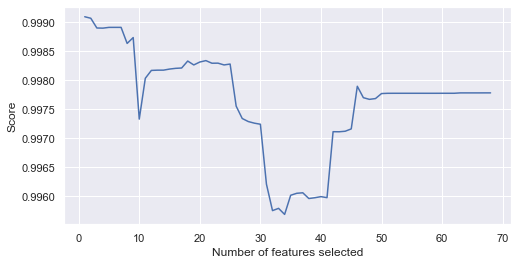

In [92]:
from sklearn.feature_selection import RFECV
import seaborn as sns

feature_names = X.columns

# recursive feature elimination with cross validation, using r-squared score as metric
lm = ElasticNet(random_state=0)  # using a linear model as before
rfecv = RFECV(estimator=lm, step=1, cv=5) 
rfecv.fit(X, Y)

# print the optimal number of features
print('Optimal number of features: {}'.format(rfecv.n_features_))

# save the selected features
print('Features selected: {}'.format(', '.join(np.array(feature_names)[rfecv.support_].tolist())))

# get the feature elimination order
ranked_features, _ = zip(*sorted(zip(feature_names, rfecv.ranking_.tolist()),
                                 key=lambda x: x[1],
                                 reverse=True))
print('Suggested order of feature removal: {}'.format(', '.join(ranked_features)))

# plot number of features vs. scores
sns.set_style("darkgrid")
plt.figure(figsize=(8, 4))
plt.xlabel("Number of features selected")
plt.ylabel("Score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

### Selected features

In [93]:
df = df[['close', 'others_cr']]
df.tail()

close  others_cr
2020-10-29 01:00:00  13289.27  12.108369
2020-10-29 02:00:00  13263.52  11.891142
2020-10-29 02:00:00  13263.23  11.888695
2020-10-29 02:00:00  13262.43  11.881947
2020-10-29 02:00:00  13263.23  11.888695

### Label creation

In [94]:
fcast_col = 'close' # creating label
fcast_out = int(72) # prediction for next 10 days
print('length =', len(df), "and forecast_out =", fcast_out)


length = 8004 and forecast_out = 72


In [95]:
df['label'] = df[fcast_col].shift(-fcast_out)
df = df.astype(float)

b = df.drop(['label', 'close'], axis=1)
# Define features Matrix X by excluding the label column which we just created 
X = np.array(b) # dropping label from feature
X_fcast_out = X[-fcast_out:]
X = X[:-fcast_out]

"""
X contains last 'n= forecast_out' rows for which we don't have label data
Put those rows in different Matrix X_forecast_out by X_forecast_out = X[end-forecast_out:end]
"""
print ("Length of X_forecast_out:", len(X_fcast_out), "& Length of X :", len(X)); print()

# Similarly Define Label vector y for the data we have prediction for
# A good test is to make sure length of X and y are identical

y = np.array(df['label'])
y = y[:-fcast_out]
print('Length of y: ',len(y)); print()



<IPython.core.display.Javascript object>

Length of X_forecast_out: 72 & Length of X : 7932



<IPython.core.display.Javascript object>

Length of y:  7932



In [96]:
from sklearn.model_selection import TimeSeriesSplit
# Split the data into train and test data set
tscv = TimeSeriesSplit();
#print(tscv);
TimeSeriesSplit(max_train_size = 0.80, n_splits=5);
for train_index, test_index in tscv.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index);
    X_train, X_test = X[train_index], X[test_index];
    y_train, y_test = y[train_index], y[test_index];
    

# regression model
lm = ElasticNet(random_state=0).fit(X_train, y_train)

tr_pred = lm.predict(X_train)
r_squared = r2_score(y_train, tr_pred)
mae = np.mean(abs(tr_pred - y_train))
rmse = np.sqrt(np.mean((tr_pred - y_train)**2))
rae = np.mean(abs(tr_pred - y_train)) / np.mean(abs(y_train - np.mean(y_train)))
rse = np.mean((tr_pred - y_train)**2) / np.mean((y_train - np.mean(y_train))**2)
sum_df = DataFrame(index = ['R-squared', 'Mean Absolute Error', 'Root Mean Squared Error',
                                'Relative Absolute Error', 'Relative Squared Error'])
sum_df['Training metrics'] = [r_squared, mae, rmse, rae, rse]

te_pred = lm.predict(X_test)
r_squared = r2_score(y_test, te_pred)
mae = np.mean(abs(te_pred - y_test))
rmse = np.sqrt(np.mean((te_pred - y_test)**2))
rae = np.mean(abs(te_pred - y_test)) / np.mean(abs(y_test - np.mean(y_test)))
rse = np.mean((te_pred - y_test)**2) / np.mean((y_test - np.mean(y_test))**2)

sum_df['Validation metrics'] = [r_squared, mae, rmse, rae, rse]
sum_df= sum_df.round(decimals=3)
print(sum_df)

# actual vs prediction test

y_test = DataFrame(y_test) # actual
y_test.index = btc.index[-len(y_test):]
y_test.rename(columns = {0: 'Actual'}, inplace = True)
#y_test.tail()

from pandas import DataFrame, concat

# Actual vs prediction validation
predict = DataFrame(lm.predict(X_test)) # prediction
predict.rename(columns = {0: 'Predicted'}, inplace = True)
predict.index = y_test.index


fig = go.Figure()
fig.add_trace(go.Scatter(x = btc['close'].index, y = btc['close'],
                         marker = dict(color = "red"), name = "Actual close price"))
fig.add_trace(go.Scatter(x = predict.index, y = predict['Predicted'], marker = dict(
        color = "green"), name = "Prediction"))
fig.update_xaxes(showline = True, linewidth = 2, linecolor = 'black', mirror = True, showspikes = True,)
fig.update_yaxes(showline = True, linewidth = 2, linecolor = 'black', mirror = True, showspikes = True,)
fig.update_layout(
    title= "Actual vs Prediction", 
    yaxis_title = 'BTC (US$)',
    hovermode = "x",
    hoverdistance = 100, # Distance to show hover label of data point
    spikedistance = 1000)
fig.update_layout(autosize = False, width = 1000, height = 400,)
fig.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

                         Training metrics  Validation metrics
R-squared                           0.876               0.828
Mean Absolute Error               145.274             252.343
Root Mean Squared Error           201.251             335.075
Relative Absolute Error             0.282               0.332
Relative Squared Error              0.124               0.172


Above performance is not encouraging; so, non-linear model is being discared.

In [99]:
DataFrame(lm.predict(X_fcast_out)) # prediction


0
0   13376.269215
1   13376.269215
2   13376.269215
3   13376.269215
4   13347.237657
5   13347.237657
6   13347.237657
7   13347.237657
8   13130.196964
9   13130.196964
10  13130.196964
11  13130.196964
12  13093.677793
13  13093.677793
14  13093.677793
15  13093.677793
16  12933.835911
17  12933.835911
18  12933.835911
19  12933.835911
20  12896.024831
21  12896.024831
22  12896.024831
23  12896.024831
24  13038.980918
25  13038.980918
26  13038.980918
27  13038.980918
28  12970.946448
29  12970.946448
30  12970.946448
31  12970.946448
32  12998.895351
33  12998.895351
34  12998.895351
35  12998.895351
36  13022.668294
37  13022.668294
38  13022.668294
39  13022.668294
40  12981.254426
41  12981.254426
42  12981.254426
43  12981.254426
44  13020.066280
45  13020.066280
46  13020.066280
47  13020.066280
48  13007.674872
49  13007.674872
50  13007.674872
51  13007.674872
52  13065.919948
53  13065.919948
54  13065.919948
55  13065.919948
56  13083.178758
57  13083.178758
58  13083.178758
59  13083.178758
60  13061.552932
61  13061.552932
62  13061.552932
63  13061.552932
64  13086.181082
65  13086.181082
66  13086.181082
67  13086.181082
68  13062.753861
69  13062.490020
70  13061.762184
71  13062.490020